# COVID Data Visualization for 18 Cities 

In [ ]:
# Installing dependencies (uncomment the line below if you havent installed the dependencies)
# !pip install pandas, matplotlib, seaborn, openpyxl 

In [13]:
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [14]:
'''

NASA/POWER SRB/FLASHFlux/MERRA2/GEOS 5.12.4 (FP-IT) 0.5 x 0.5 Degree Daily Averaged Data 

Dates (month/day/year): 03/01/2020 through 03/18/2021

Location: Latitude  26.921   Longitude 49.5992

Elevation from MERRA-2: Average for 1/2x1/2 degree lat/lon region = 24.51 meters   Site = na

Climate zone: na (reference Briggs et al: http://www.energycodes.gov)
Value for missing model data cannot be computed or out of model availability range: -999


Parameter(s):
PRECTOT MERRA2 1/2x1/2 Precipitation (mm day-1)

RH2M MERRA2 1/2x1/2 Relative Humidity at 2 Meters (%)

WS50M_RANGE MERRA2 1/2x1/2 Wind Speed Range at 50 Meters (m/s)

T2M_MIN MERRA2 1/2x1/2 Minimum Temperature at 2 Meters (C)

WS10M_RANGE MERRA2 1/2x1/2 Wind Speed Range at 10 Meters (m/s)

T2M MERRA2 1/2x1/2 Temperature at 2 Meters (C)

T2MDEW MERRA2 1/2x1/2 Dew/Frost Point at 2 Meters (C)

T2M_MAX MERRA2 1/2x1/2 Maximum Temperature at 2 Meters (C)

''';

In [15]:
xls = pd.ExcelFile('14_Cities_weather_cases.xlsx')
df_abha = pd.read_excel(xls, 'abha')
df_najran = pd.read_excel(xls, 'najran')
df_sharoura = pd.read_excel(xls, 'sharoura')
df_qurayat = pd.read_excel(xls, 'qurayat')
df_tabuk = pd.read_excel(xls, 'tabuk')
df_hail = pd.read_excel(xls, 'hail')
df_jed = pd.read_excel(xls, 'JED')
df_mak = pd.read_excel(xls, 'MAK')
df_taif = pd.read_excel(xls, 'TAIF')
df_madina = pd.read_excel(xls, 'MAD')
df_riyadh = pd.read_excel(xls, 'RUH')
df_dam = pd.read_excel(xls, 'DAM')
df_hofuf = pd.read_excel(xls, 'HOFUF') 
df_jubail = pd.read_excel(xls, 'JUBAIL')
df_dam.rename({"datae":"date"}, axis=1, inplace=True)

In [16]:
df_list = [
    df_abha, df_najran, df_sharoura, df_qurayat, df_tabuk, df_hail, df_jed, 
    df_mak, df_taif, df_madina, df_riyadh, df_dam, df_hofuf, df_jubail
]

#### Aggregate opperation

In [17]:
for df in df_list:
    df.drop(["LAT", "LON", "YEAR", "MO", "DY"], axis=1, inplace=True)
    try:
        df.index = df["date"]
        df.drop(["date"], axis=1, inplace=True)
    except KeyError:
        df.index = df["DATE"]
        df.drop(["DATE"], axis=1, inplace=True)
    df.drop(df.tail(2).index,inplace=True) 

#### Functions and variables

In [18]:
phase1start = "2020-03-01"
phase1end = "2020-08-01"
phase2start = "2020-08-01"
phase2end ="2021-03-18"

In [19]:
def phase_mask(dataframe, p1s=phase1start, p1e=phase1end, p2s=phase2start, p2e=phase2end):
    phase1_mask = (dataframe.index >= p1s) & (dataframe.index <= p1e)
    phase2_mask = (dataframe.index >= p2s ) & (dataframe.index <= p2e)
    phase1_df = dataframe.loc[phase1_mask]
    phase2_df = dataframe.loc[phase2_mask]
    return phase1_df, phase2_df

In [20]:
def line_plot(df, title, xlabel="Months", ylabel="Values"):
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.plot(df)
    date_form = DateFormatter("%m")

    ax.xaxis.set_major_formatter(date_form)
    ax.legend(df.columns.tolist(), loc='center left', bbox_to_anchor=(1, .5))

    ax.set(xlabel=xlabel,
           ylabel=ylabel,
           title=title)
    return fig, ax

In [21]:
def scatter_plot(data, x, y):
    sns.scatterplot(
    data=data, x=x, y=y,
    sizes=(20, 200), legend="full")

## ABHA

In [79]:
df_abha

PRECTOT   RH2M  T2MDEW  T2M_MAX  T2M_MIN    T2M  WS50M_RANGE  \
date                                                                       
2020-03-01     0.00  59.77   13.97    28.18    17.29  22.05         5.80   
2020-03-02     0.00  52.24   12.53    29.64    17.54  22.77         4.93   
2020-03-03     0.00  47.91   11.11    29.44    16.78  22.69         6.11   
2020-03-04     0.00  58.32   14.64    29.50    17.98  23.17         6.54   
2020-03-05     0.00  55.09   13.57    29.60    17.79  22.98         5.76   
...             ...    ...     ...      ...      ...    ...          ...   
2021-03-12     0.00  41.83   10.73    31.45    19.75  24.59         4.91   
2021-03-13     0.00  39.13    9.93    31.81    19.33  24.84         5.35   
2021-03-14     0.00  40.58   10.60    31.03    20.81  24.96         5.34   
2021-03-15     0.00  45.64   11.98    31.26    18.63  24.47         3.36   
2021-03-16     0.01  45.94   12.08    31.87    18.98  24.47         4.61   

            WS10M_RANGE  cases  recoveries  mortalities  
date                                                     
2020-03-01         6.23    NaN         NaN          NaN  
2020-03-02         5.67    NaN         NaN          NaN  
2020-03-03         6.41    NaN         NaN          NaN  
2020-03-04         6.78    NaN         NaN          NaN  
2020-03-05         6.15    NaN         NaN          NaN  
...                 ...    ...         ...          ...  
2021-03-12         5.85    1.0         NaN          1.0  
2021-03-13         6.05    1.0         NaN          NaN  
2021-03-14         5.89    2.0         4.0          NaN  
2021-03-15         4.89    1.0         NaN          NaN  
2021-03-16         5.59    1.0         1.0          NaN  

[381 rows x 11 columns]

In [80]:
phase1_abha, phase2_abha = phase_mask(df_abha)

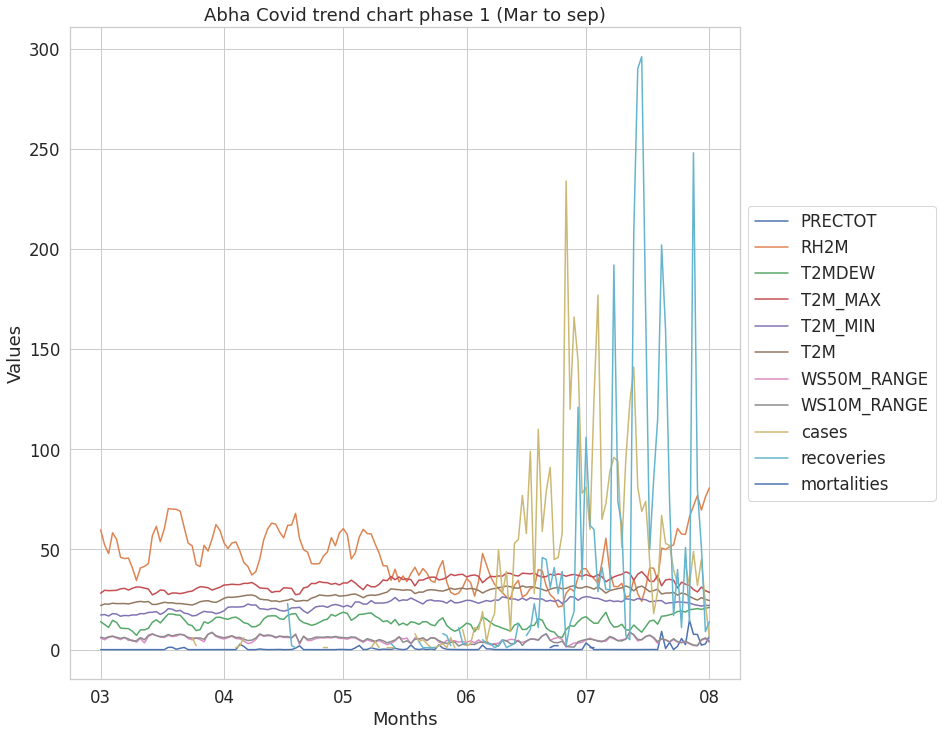

In [81]:
line_plot(phase1_abha, "Abha Covid trend chart phase 1 (Mar to sep)");

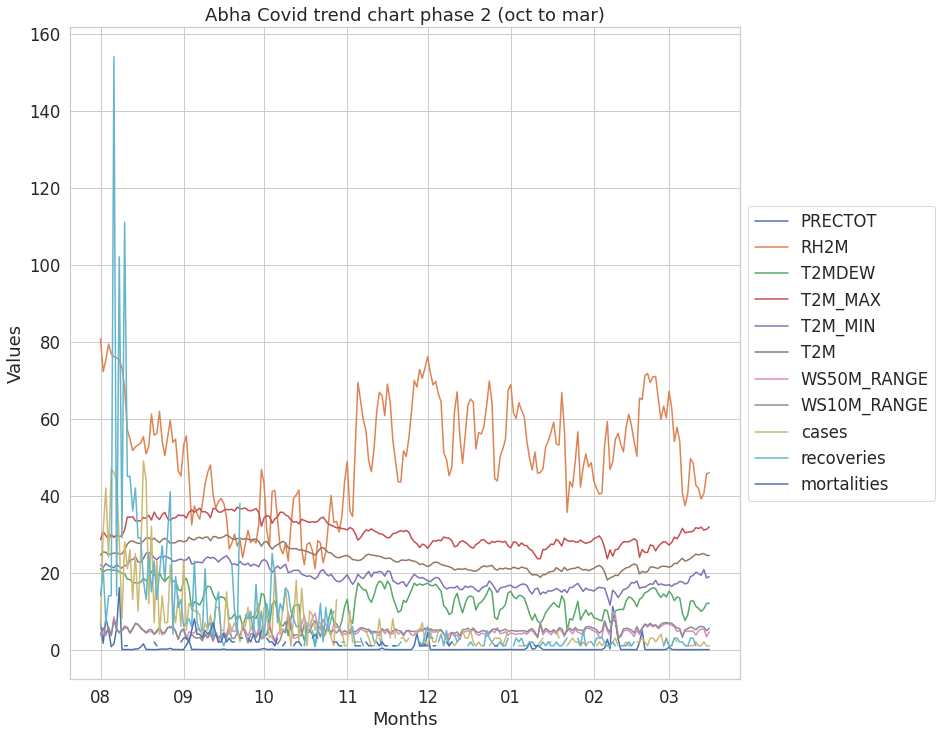

In [82]:
line_plot(phase2_abha, "Abha Covid trend chart phase 2 (oct to mar)");

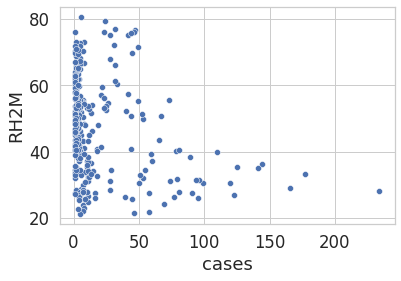

In [83]:
scatter_plot(df_abha, "cases", "RH2M")  # y = 1/x^2

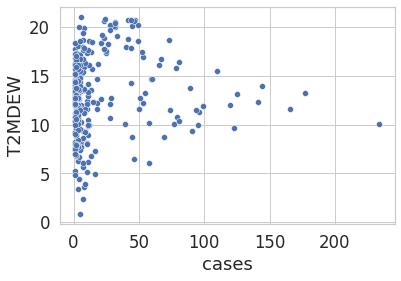

In [84]:
scatter_plot(df_abha, "cases", "T2MDEW")

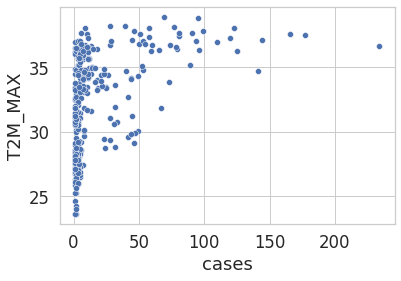

In [85]:
scatter_plot(df_abha, "cases", "T2M_MAX")  # y = Kx^(1/n)

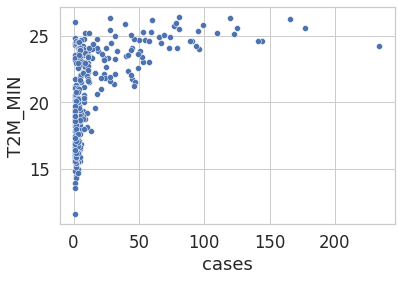

In [86]:
scatter_plot(df_abha, "cases", "T2M_MIN") # y = Kx^(1/n)

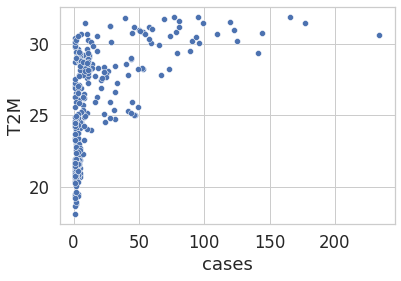

In [87]:
scatter_plot(df_abha, "cases", "T2M") # y = Kx^(1/n)

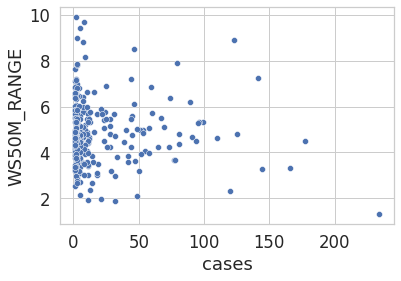

In [88]:
scatter_plot(df_abha, "cases", "WS50M_RANGE")

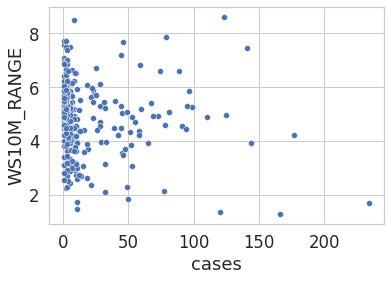

In [89]:
scatter_plot(df_abha, "cases", "WS10M_RANGE")

## Najran

In [22]:
df_najran

PRECTOT   RH2M  T2MDEW  T2M_MAX  T2M_MIN    T2M  WS50M_RANGE  \
date                                                                       
2020-03-01      0.0  34.52    6.41    32.42    14.90  22.99         3.96   
2020-03-02      0.0  32.12    5.00    30.83    16.10  22.58         3.23   
2020-03-03      0.0  22.55   -2.20    28.91    12.95  19.87         5.52   
2020-03-04      0.0  28.32    1.33    30.01    12.72  20.40         2.94   
2020-03-05      0.0  27.52    1.80    31.31    13.89  21.40         3.05   
...             ...    ...     ...      ...      ...    ...          ...   
2021-03-12      0.0  14.03   -5.87    33.47    13.98  23.13         4.41   
2021-03-13      0.0  23.50    1.44    32.53    15.44  23.54         4.95   
2021-03-14      0.0  17.30   -4.02    30.99    14.43  21.95         7.43   
2021-03-15      0.0  16.50   -4.45    31.88    13.86  22.19         6.34   
2021-03-16      0.0  14.15   -5.82    32.92    15.27  23.06         6.10   

            WS10M_RANGE  cases  recoveries  mortalities  
date                                                     
2020-03-01         2.54    NaN         NaN          NaN  
2020-03-02         1.83    NaN         NaN          NaN  
2020-03-03         4.20    NaN         NaN          NaN  
2020-03-04         3.30    NaN         NaN          NaN  
2020-03-05         3.08    NaN         NaN          NaN  
...                 ...    ...         ...          ...  
2021-03-12         2.17    2.0         4.0          NaN  
2021-03-13         3.62    4.0         4.0          NaN  
2021-03-14         5.27    2.0         NaN          NaN  
2021-03-15         4.28    2.0         2.0          NaN  
2021-03-16         4.34    2.0         NaN          NaN  

[381 rows x 11 columns]

In [23]:
phase1_najran, phase2_najran = phase_mask(df_najran)

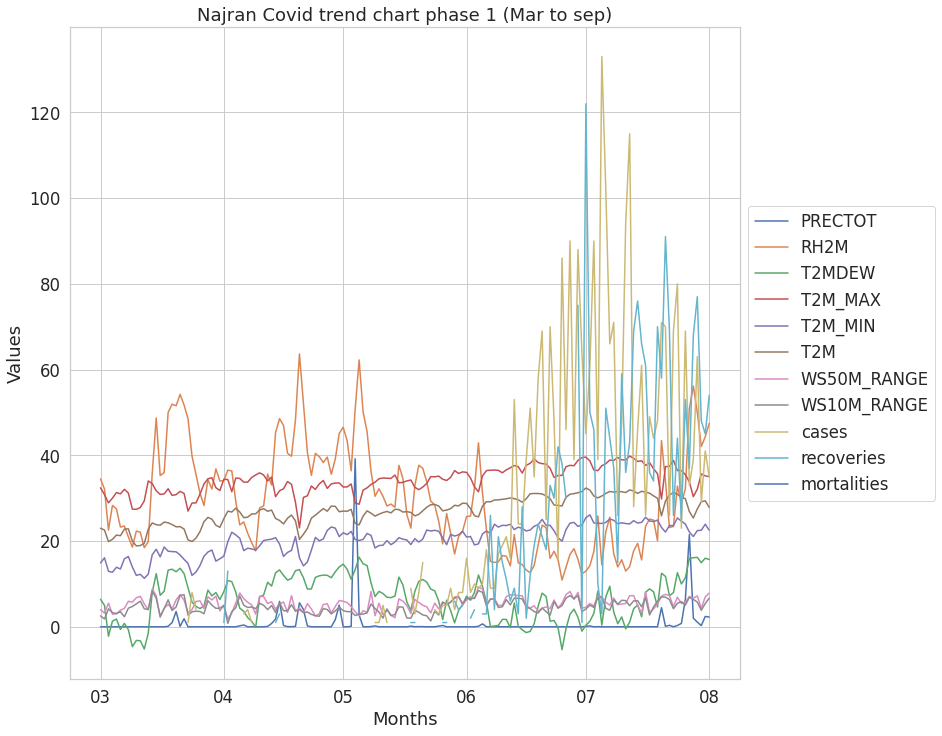

In [24]:
line_plot(phase1_najran, "Najran Covid trend chart phase 1 (Mar to sep)");

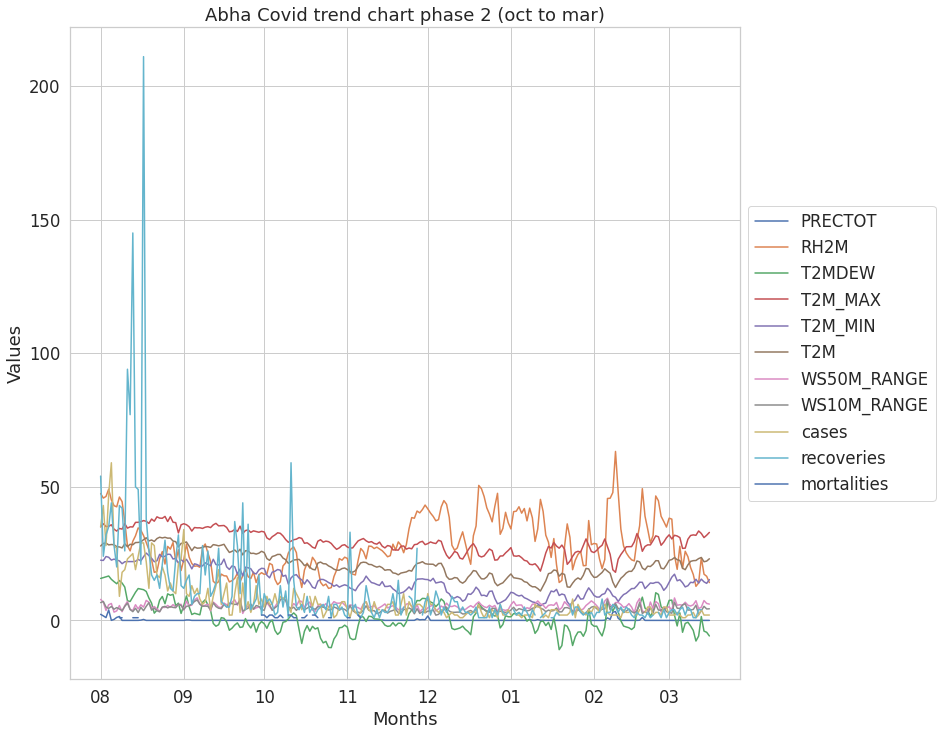

In [25]:
line_plot(phase2_najran, "Abha Covid trend chart phase 2 (oct to mar)");

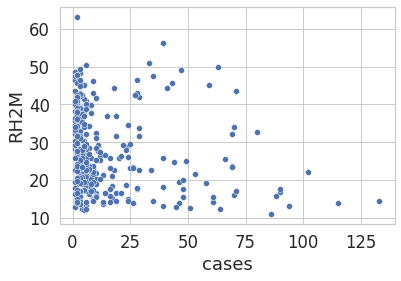

In [26]:
scatter_plot(df_najran, "cases", "RH2M")  

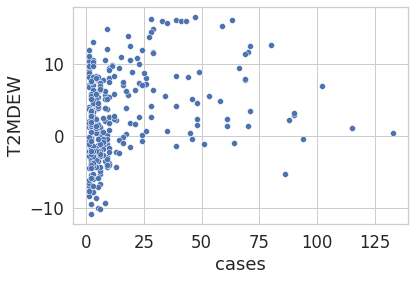

In [27]:
scatter_plot(df_najran, "cases", "T2MDEW")

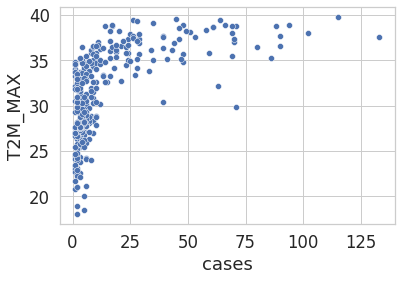

In [28]:
scatter_plot(df_najran, "cases", "T2M_MAX") 

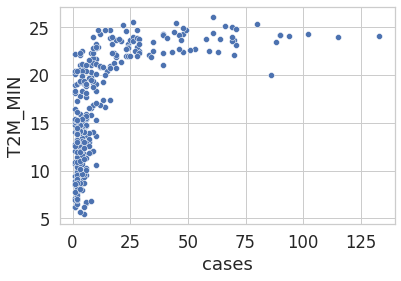

In [29]:
scatter_plot(df_najran, "cases", "T2M_MIN")

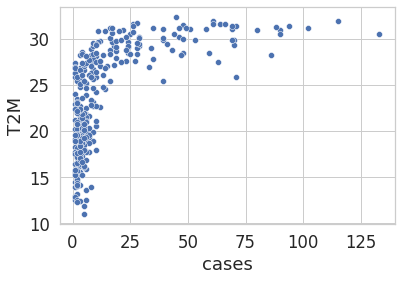

In [30]:
scatter_plot(df_najran, "cases", "T2M")

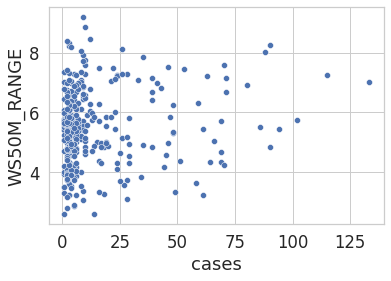

In [31]:
scatter_plot(df_najran, "cases", "WS50M_RANGE")

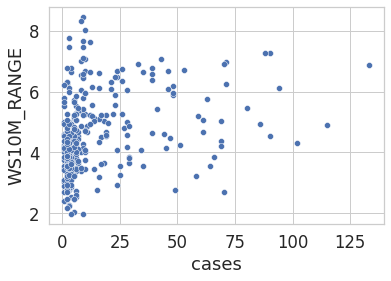

In [32]:
scatter_plot(df_najran, "cases", "WS10M_RANGE")

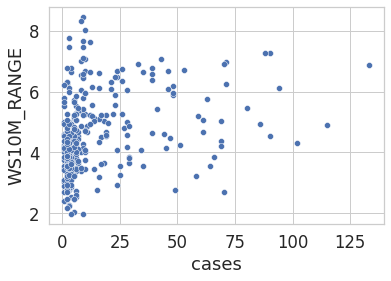

In [33]:
scatter_plot(df_najran, "cases", "WS10M_RANGE")

## Sharoura

In [34]:
df_sharoura

PRECTOT   RH2M  T2MDEW  T2M_MAX  T2M_MIN    T2M  WS50M_RANGE  \
date                                                                       
2020-03-01      0.0  21.62    1.00    33.92    15.40  24.38         7.26   
2020-03-02      0.0  21.13    1.31    34.23    16.74  25.12         9.84   
2020-03-03      0.0  20.16   -1.79    29.65    15.20  22.16         5.58   
2020-03-04      0.0  23.99    0.18    29.44    14.69  21.71         5.90   
2020-03-05      0.0  18.17   -3.19    30.37    14.64  22.16         7.26   
...             ...    ...     ...      ...      ...    ...          ...   
2021-03-12      0.0  16.70   -2.00    34.35    16.21  25.03         8.85   
2021-03-13      0.0  19.16   -0.39    35.32    15.35  24.69         9.28   
2021-03-14      0.0  24.36    2.22    33.86    14.92  23.87         8.21   
2021-03-15      0.0  21.63    0.82    34.21    14.50  24.15         6.73   
2021-03-16      0.0  21.03    0.91    34.56    15.71  24.72         5.82   

            WS10M_RANGE  cases  recoveries  mortalities  
date                                                     
2020-03-01         5.14    NaN         NaN          NaN  
2020-03-02         5.99    NaN         NaN          NaN  
2020-03-03         2.95    NaN         NaN          NaN  
2020-03-04         3.53    NaN         NaN          NaN  
2020-03-05         3.58    NaN         NaN          NaN  
...                 ...    ...         ...          ...  
2021-03-12         5.43    NaN         NaN          NaN  
2021-03-13         5.53    NaN         1.0          NaN  
2021-03-14         4.28    NaN         NaN          NaN  
2021-03-15         2.79    NaN         NaN          NaN  
2021-03-16         2.76    NaN         NaN          NaN  

[381 rows x 11 columns]

In [35]:
phase1_sharoura, phase2_sharoura = phase_mask(df_sharoura)

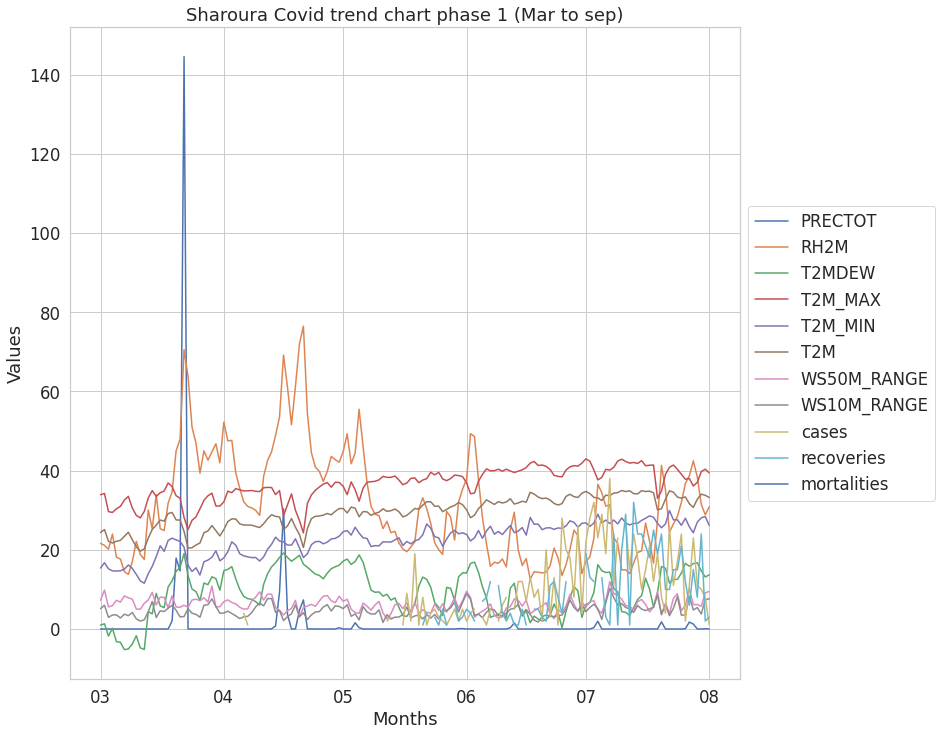

In [36]:
line_plot(phase1_sharoura, "Sharoura Covid trend chart phase 1 (Mar to sep)");

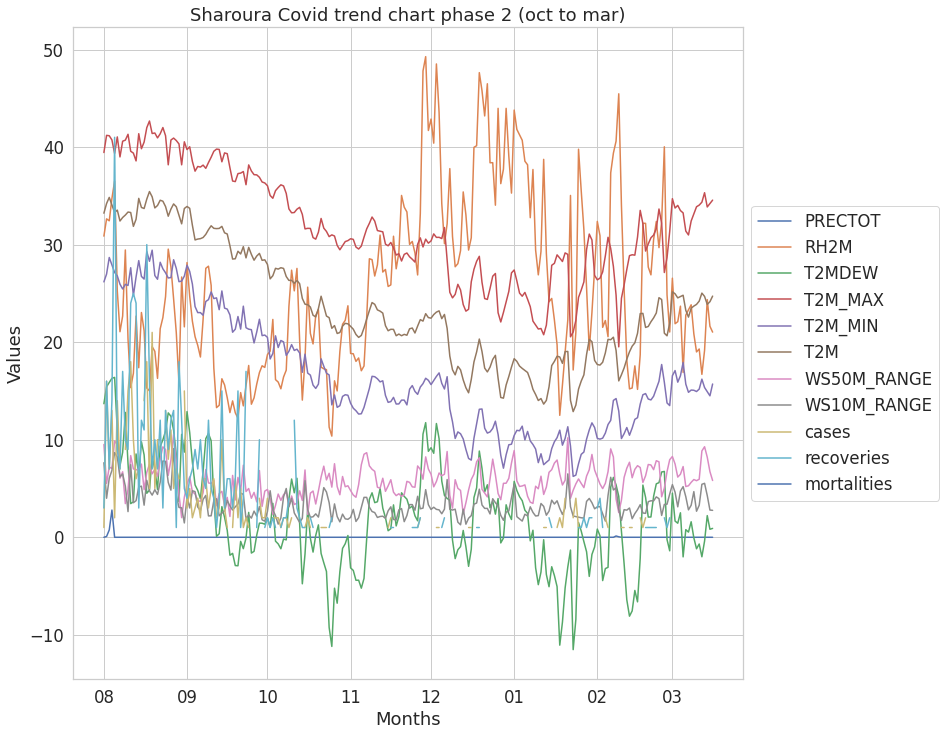

In [37]:
line_plot(phase2_sharoura, "Sharoura Covid trend chart phase 2 (oct to mar)");

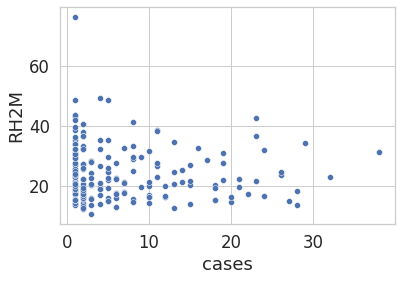

In [38]:
scatter_plot(df_sharoura, "cases", "RH2M")  

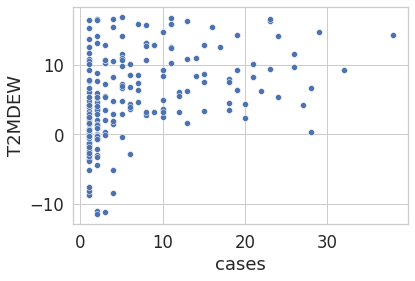

In [39]:
scatter_plot(df_sharoura, "cases", "T2MDEW")

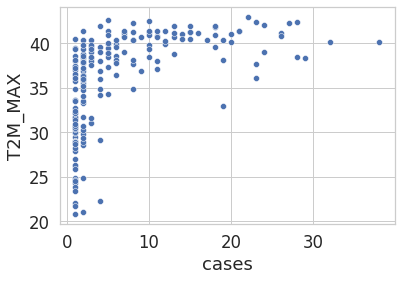

In [40]:
scatter_plot(df_sharoura, "cases", "T2M_MAX") 

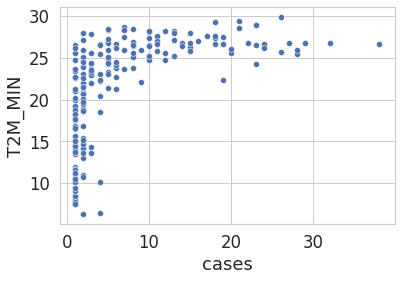

In [41]:
scatter_plot(df_sharoura, "cases", "T2M_MIN") 

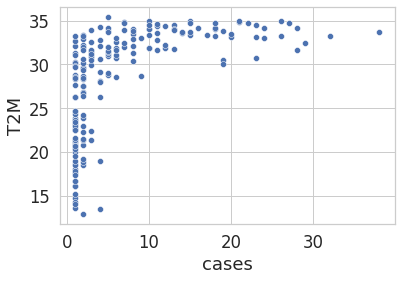

In [42]:
scatter_plot(df_sharoura, "cases", "T2M") 

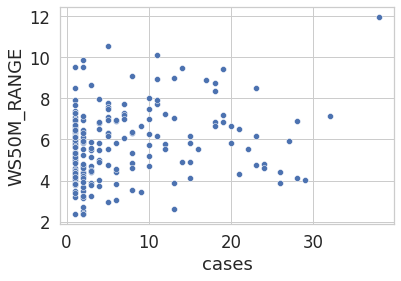

In [43]:
scatter_plot(df_sharoura, "cases", "WS50M_RANGE")

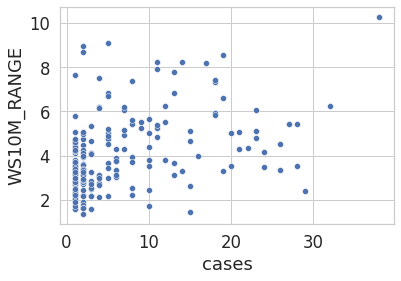

In [44]:
scatter_plot(df_sharoura, "cases", "WS10M_RANGE")

## Qurayat

In [45]:
df_qurayat

PRECTOT   RH2M  T2MDEW  T2M_MAX  T2M_MIN    T2M  WS50M_RANGE  \
DATE                                                                       
2020-03-01     2.99  67.30    4.53    16.41     5.23  10.26         9.76   
2020-03-02     0.00  65.50    4.06    18.04     4.28  10.17         3.84   
2020-03-03     0.00  52.39    2.74    20.89     5.02  12.19         4.36   
2020-03-04     0.00  38.63   -0.35    24.22     4.68  13.58         3.99   
2020-03-05     0.00  36.49    0.13    27.08     4.71  15.02         6.12   
...             ...    ...     ...      ...      ...    ...          ...   
2021-03-12     0.52  57.67    4.71    18.40     6.38  12.80        12.05   
2021-03-13     0.00  43.77    0.31    20.52     4.69  12.37         5.24   
2021-03-14     0.00  29.19   -2.04    25.83     6.55  16.02         2.19   
2021-03-15     0.00  29.94    0.36    30.35    10.01  18.39         6.99   
2021-03-16     0.00  42.89    4.45    26.54    10.53  17.24         6.92   

            WS10M_RANGE  cases  recoveries  mortalities  
DATE                                                     
2020-03-01        10.20    NaN         NaN          NaN  
2020-03-02         2.01    NaN         NaN          NaN  
2020-03-03         2.52    NaN         NaN          NaN  
2020-03-04         3.95    NaN         NaN          NaN  
2020-03-05         3.76    NaN         NaN          NaN  
...                 ...    ...         ...          ...  
2021-03-12        11.35    1.0         1.0          NaN  
2021-03-13         2.16    1.0         2.0          NaN  
2021-03-14         1.28    1.0         NaN          NaN  
2021-03-15         6.58    1.0         NaN          1.0  
2021-03-16         4.90    NaN         1.0          NaN  

[381 rows x 11 columns]

In [46]:
phase1_qurayat, phase2_qurayat = phase_mask(df_qurayat)

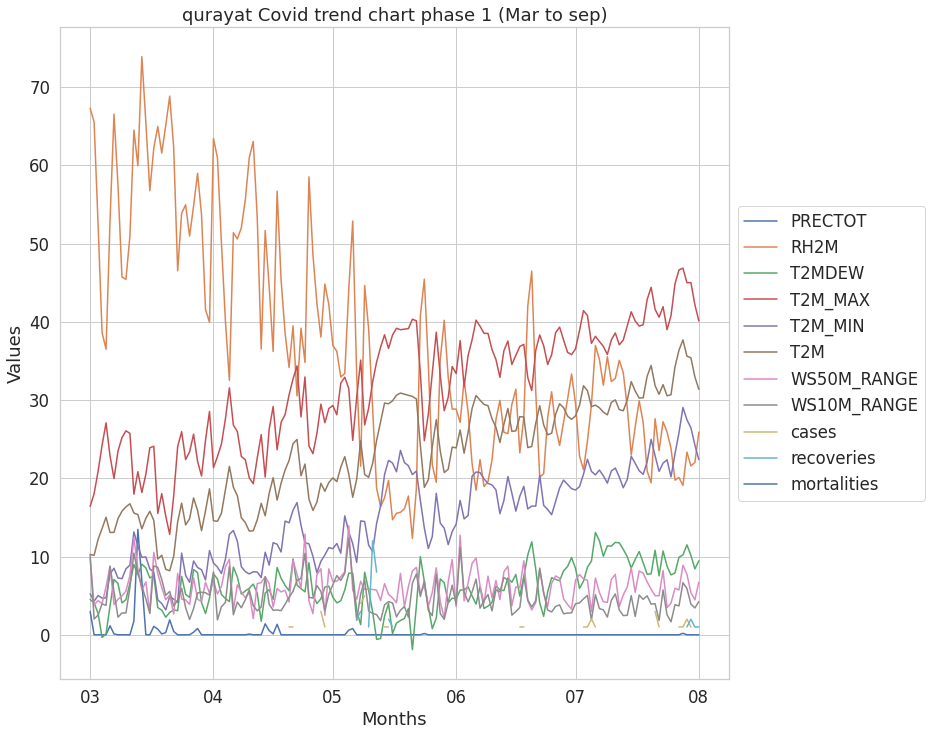

In [47]:
line_plot(phase1_qurayat, "qurayat Covid trend chart phase 1 (Mar to sep)");


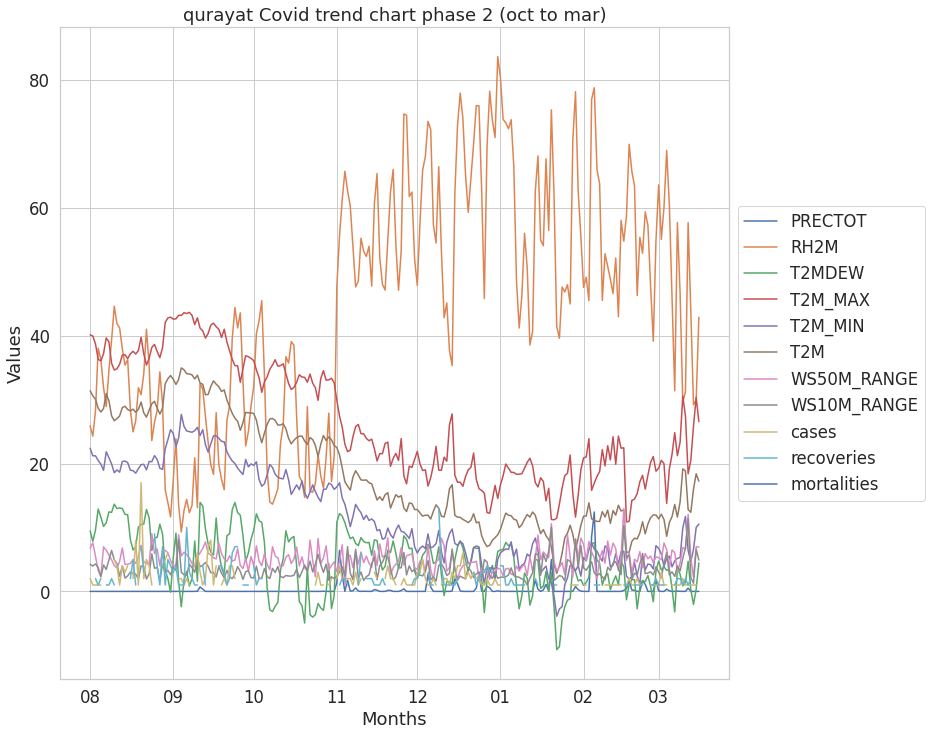

In [48]:
line_plot(phase2_qurayat, "qurayat Covid trend chart phase 2 (oct to mar)");

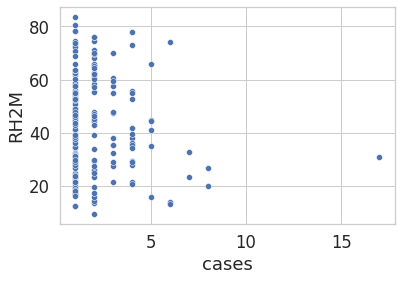

In [49]:
scatter_plot(df_qurayat, "cases", "RH2M")  

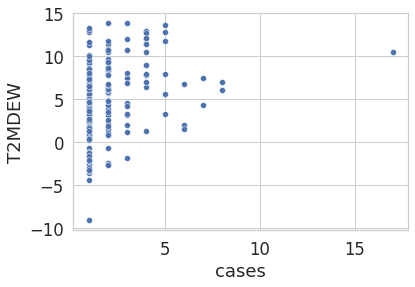

In [50]:
scatter_plot(df_qurayat, "cases", "T2MDEW")

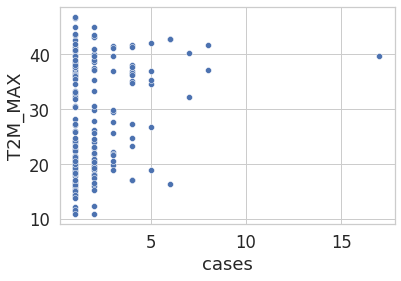

In [51]:
scatter_plot(df_qurayat, "cases", "T2M_MAX") 

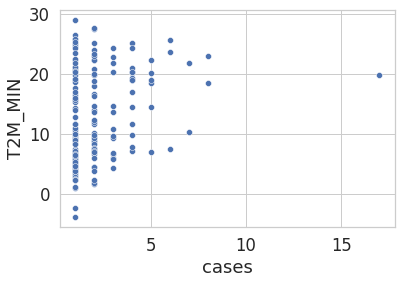

In [52]:
scatter_plot(df_qurayat, "cases", "T2M_MIN")

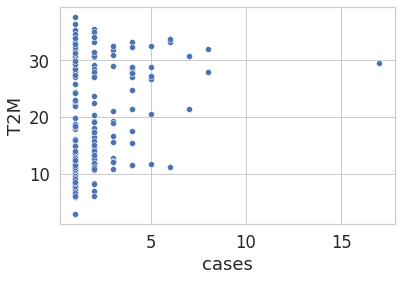

In [53]:
scatter_plot(df_qurayat, "cases", "T2M")

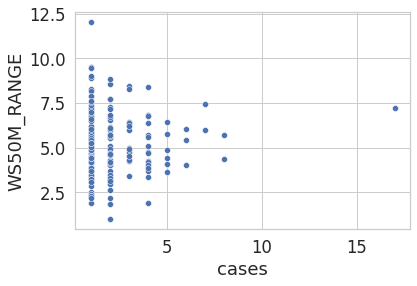

In [54]:
scatter_plot(df_qurayat, "cases", "WS50M_RANGE")

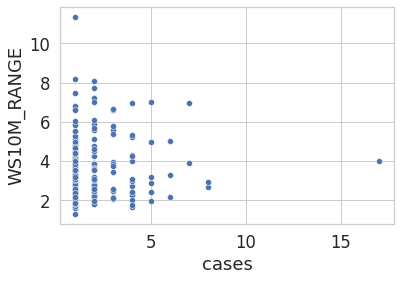

In [55]:
scatter_plot(df_qurayat, "cases", "WS10M_RANGE")

## Tabuk

In [56]:
df_tabuk

PRECTOT   RH2M  T2MDEW  T2M_MAX  T2M_MIN    T2M  WS50M_RANGE  \
date                                                                       
2020-03-01      0.0  42.96   -1.25    20.00     4.71  10.94         2.92   
2020-03-02      0.0  32.82   -3.32    24.15     2.56  12.76         5.71   
2020-03-03      0.0  19.86   -8.05    26.27     5.07  14.85         7.88   
2020-03-04      0.0  14.79  -10.04    29.01     6.66  17.04         6.64   
2020-03-05      0.0  16.22   -8.13    28.30     9.80  17.92         6.24   
...             ...    ...     ...      ...      ...    ...          ...   
2021-03-12      0.0  32.71   -0.89    21.71     7.91  15.57         7.51   
2021-03-13      0.0  32.40   -1.80    26.12     4.43  14.69         7.01   
2021-03-14      0.0  18.06   -6.17    29.57     8.41  18.62         7.91   
2021-03-15      0.0  18.29   -3.90    29.41    13.30  21.18         4.68   
2021-03-16      0.0  26.45    1.01    30.30    14.54  21.12         8.17   

            WS10M_RANGE  cases  recoveries  mortalities  
date                                                     
2020-03-01         3.79    NaN         NaN          NaN  
2020-03-02         4.01    NaN         NaN          NaN  
2020-03-03         3.39    NaN         NaN          NaN  
2020-03-04         3.81    NaN         NaN          NaN  
2020-03-05         6.10    NaN         NaN          NaN  
...                 ...    ...         ...          ...  
2021-03-12         8.36    1.0         6.0          NaN  
2021-03-13         5.12    2.0         1.0          1.0  
2021-03-14         4.35    2.0         2.0          NaN  
2021-03-15         5.16    5.0         2.0          NaN  
2021-03-16         7.86    2.0         3.0          NaN  

[381 rows x 11 columns]

In [57]:
phase1_tabuk, phase2_tabuk = phase_mask(df_tabuk)

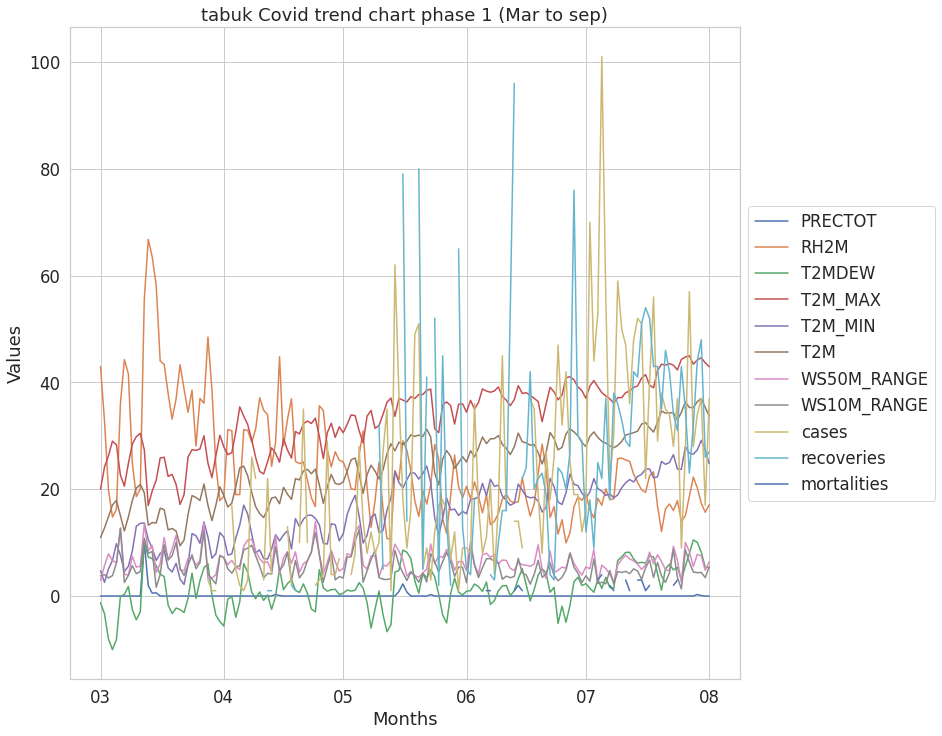

In [58]:
line_plot(phase1_tabuk, "tabuk Covid trend chart phase 1 (Mar to sep)");

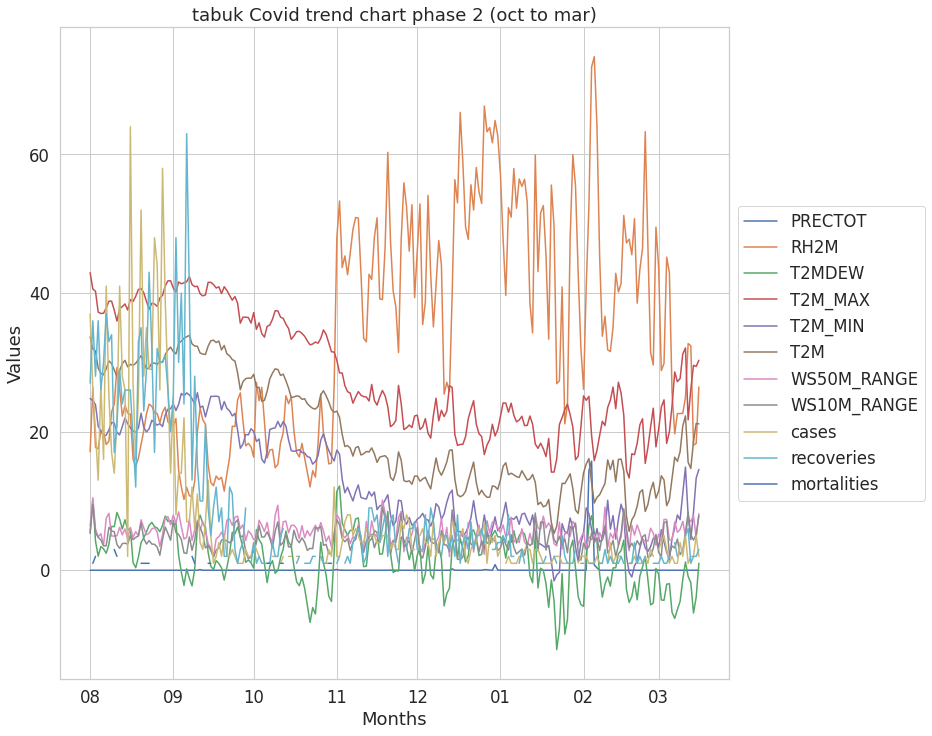

In [59]:
line_plot(phase2_tabuk, "tabuk Covid trend chart phase 2 (oct to mar)");

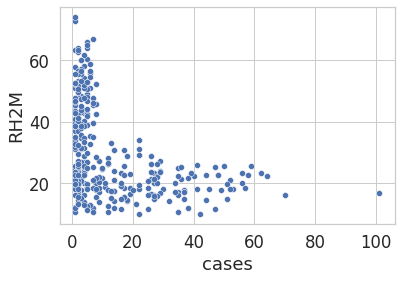

In [60]:
scatter_plot(df_tabuk, "cases", "RH2M")  

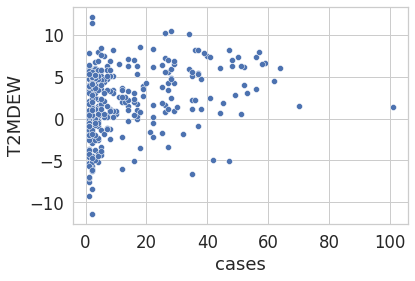

In [61]:
scatter_plot(df_tabuk, "cases", "T2MDEW")

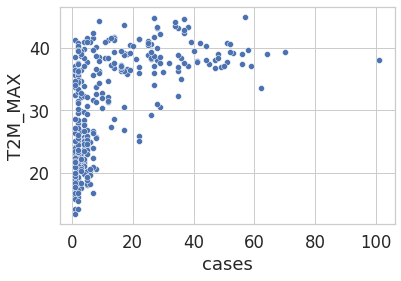

In [62]:
scatter_plot(df_tabuk, "cases", "T2M_MAX")  

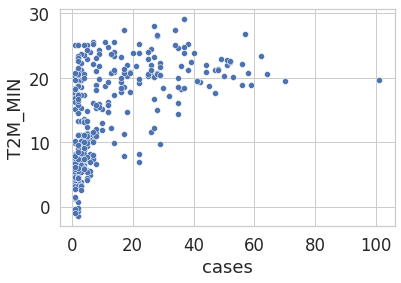

In [63]:
scatter_plot(df_tabuk, "cases", "T2M_MIN")

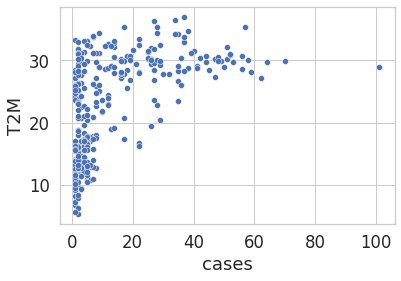

In [64]:
scatter_plot(df_tabuk, "cases", "T2M") 

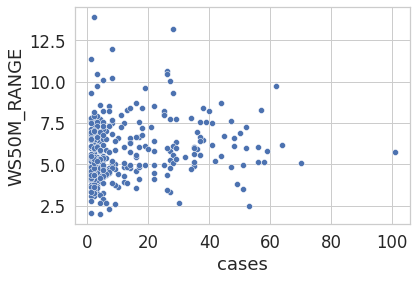

In [65]:
scatter_plot(df_tabuk, "cases", "WS50M_RANGE")

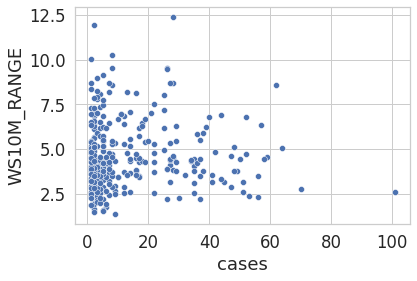

In [66]:
scatter_plot(df_tabuk, "cases", "WS10M_RANGE")

## Hail

In [67]:
df_hail

PRECTOT   RH2M  T2MDEW  T2M_MAX  T2M_MIN    T2M  WS50M_RANGE  \
date                                                                       
2020-03-01     0.00  33.12   -3.19    20.91     6.38  12.77         7.19   
2020-03-02     0.00  36.02   -3.44    20.67     3.55  11.21         4.80   
2020-03-03     0.00  25.36   -6.48    23.44     4.89  13.01         6.68   
2020-03-04     0.00  23.79   -6.42    24.95     4.88  14.05         7.80   
2020-03-05     0.00  22.14   -4.30    28.66     7.98  17.66         6.87   
...             ...    ...     ...      ...      ...    ...          ...   
2021-03-12     0.00  33.74    0.99    24.07     9.78  17.22         9.79   
2021-03-13     0.00  38.65   -0.95    21.74     5.86  12.91         7.60   
2021-03-14     0.00  32.36    0.09    27.85     6.71  16.86         6.67   
2021-03-15     0.06  35.63    4.78    30.77    10.66  20.63         4.01   
2021-03-16     0.00  35.16    7.22    31.54    17.39  23.61         5.98   

            WS10M_RANGE  cases  recoveries  mortalities  
date                                                     
2020-03-01         6.64    NaN         NaN          NaN  
2020-03-02         2.38    NaN         NaN          NaN  
2020-03-03         3.31    NaN         NaN          NaN  
2020-03-04         3.48    NaN         NaN          NaN  
2020-03-05         5.86    NaN         NaN          NaN  
...                 ...    ...         ...          ...  
2021-03-12        10.70    4.0         5.0          NaN  
2021-03-13         3.58    3.0         5.0          NaN  
2021-03-14         4.11    5.0         2.0          NaN  
2021-03-15         2.56   10.0         NaN          NaN  
2021-03-16         5.41    9.0         NaN          1.0  

[381 rows x 11 columns]

In [68]:
phase1_hail, phase2_hail = phase_mask(df_hail)

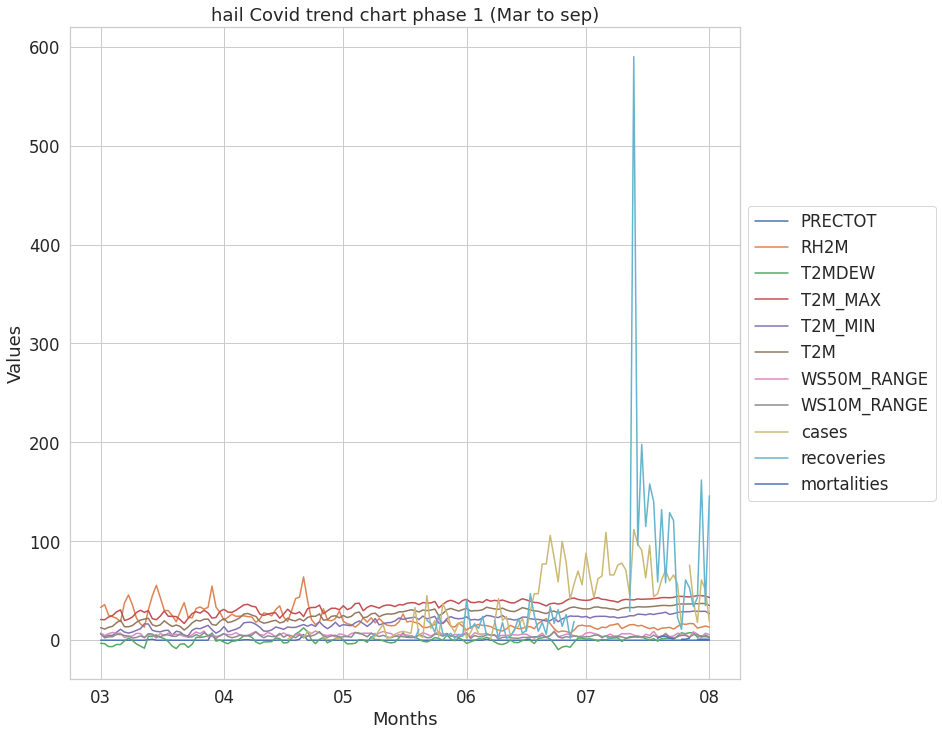

In [69]:
line_plot(phase1_hail, "hail Covid trend chart phase 1 (Mar to sep)");

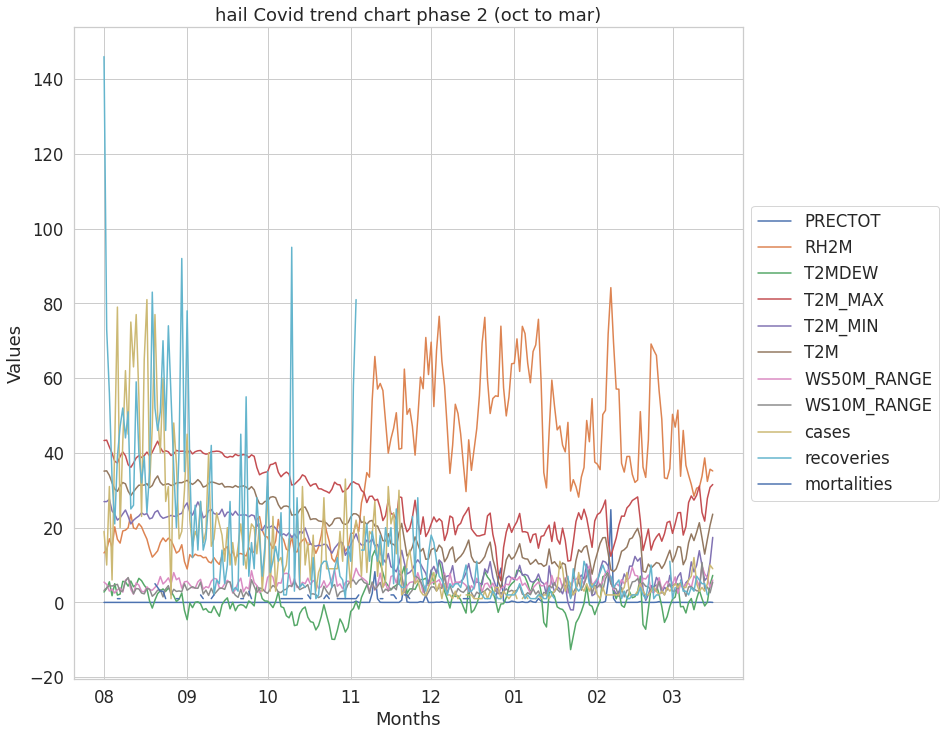

In [70]:
line_plot(phase2_hail, "hail Covid trend chart phase 2 (oct to mar)");

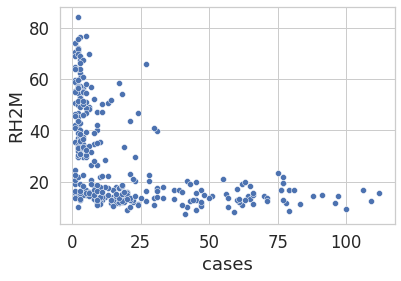

In [71]:
scatter_plot(df_hail, "cases", "RH2M")  

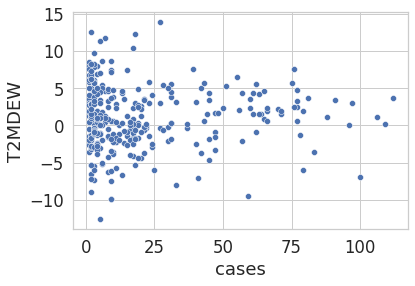

In [72]:
scatter_plot(df_hail, "cases", "T2MDEW")

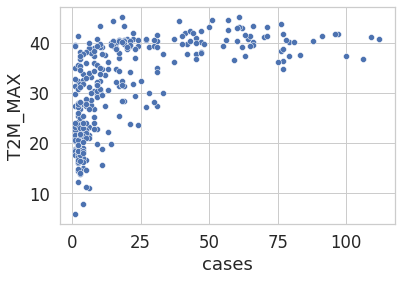

In [73]:
scatter_plot(df_hail, "cases", "T2M_MAX")

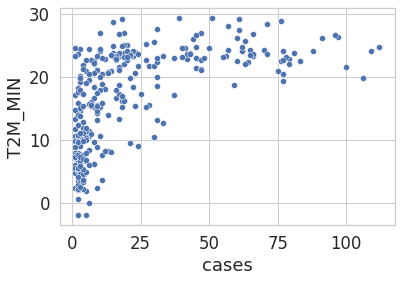

In [74]:
scatter_plot(df_hail, "cases", "T2M_MIN")

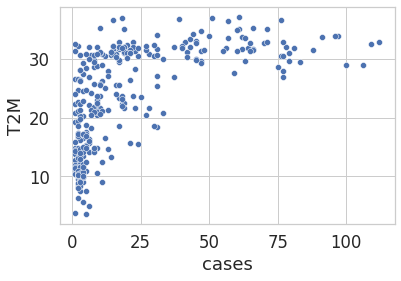

In [75]:
scatter_plot(df_hail, "cases", "T2M") 

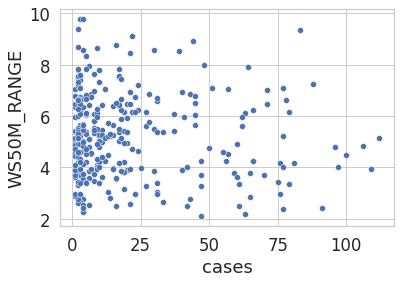

In [76]:
scatter_plot(df_hail, "cases", "WS50M_RANGE")

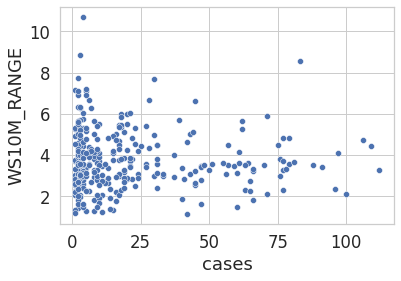

In [77]:
scatter_plot(df_hail, "cases", "WS10M_RANGE")

## Jeddah

In [90]:
df_jed

PRECTOT   RH2M  T2MDEW  T2M_MAX  T2M_MIN    T2M  WS50M_RANGE  \
DATE                                                                       
2020-03-01     0.00  48.15   11.92    29.32    19.00  23.50         3.67   
2020-03-02     0.00  38.98    9.70    33.63    18.50  24.65         5.93   
2020-03-03     0.00  40.45   10.85    31.53    19.86  25.30         3.59   
2020-03-04     0.00  55.89   16.73    31.26    22.77  26.11         4.45   
2020-03-05     0.00  59.42   17.90    31.62    22.83  26.32         3.34   
...             ...    ...     ...      ...      ...    ...          ...   
2021-03-12     0.00  45.67   15.76    34.64    24.03  28.60         3.53   
2021-03-13     0.00  48.82   15.97    33.96    22.58  27.65         4.70   
2021-03-14     0.00  47.49   15.82    33.67    23.95  27.97         5.19   
2021-03-15     0.01  54.34   17.93    33.68    23.79  27.89         7.69   
2021-03-16     0.02  50.50   16.91    34.74    23.28  28.07         8.77   

            WS10M_RANGE  cases  recoveries  mortalities  
DATE                                                     
2020-03-01         4.46    NaN         NaN          NaN  
2020-03-02         4.89    NaN         NaN          NaN  
2020-03-03         2.28    NaN         NaN          NaN  
2020-03-04         4.28    NaN         NaN          NaN  
2020-03-05         3.64    NaN         NaN          NaN  
...                 ...    ...         ...          ...  
2021-03-12         2.92   13.0        20.0          1.0  
2021-03-13         3.41   29.0        20.0          1.0  
2021-03-14         4.84   11.0        17.0          1.0  
2021-03-15         6.90   28.0        19.0          1.0  
2021-03-16         7.83   34.0        17.0          1.0  

[381 rows x 11 columns]

In [91]:
phase1_jed, phase2_jed = phase_mask(df_jed)

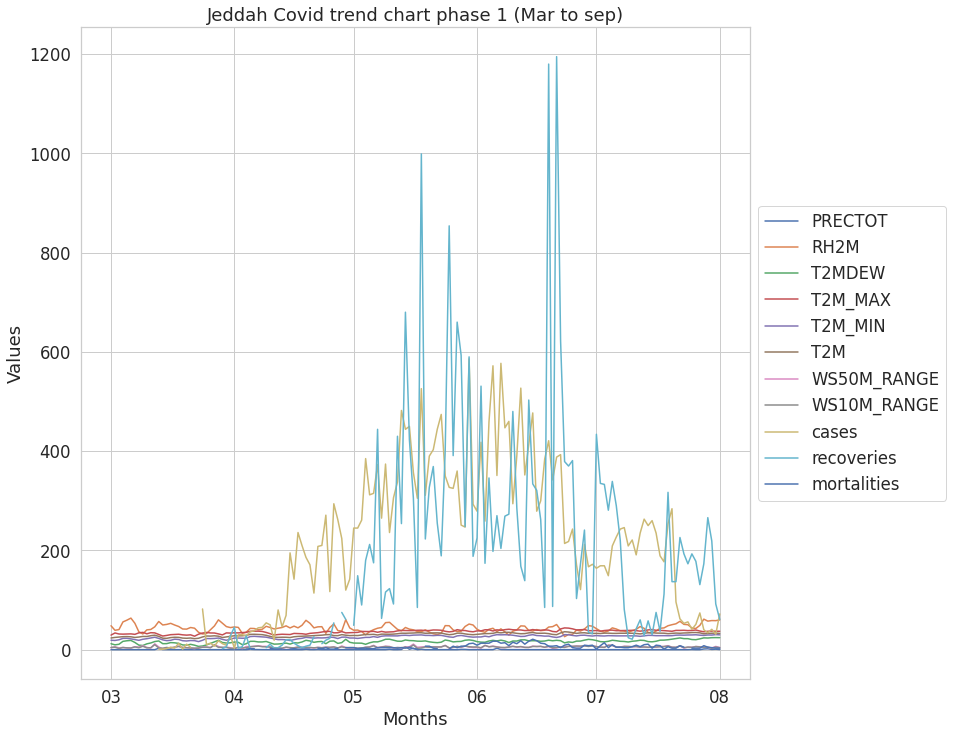

In [92]:
line_plot(phase1_jed, "Jeddah Covid trend chart phase 1 (Mar to sep)");

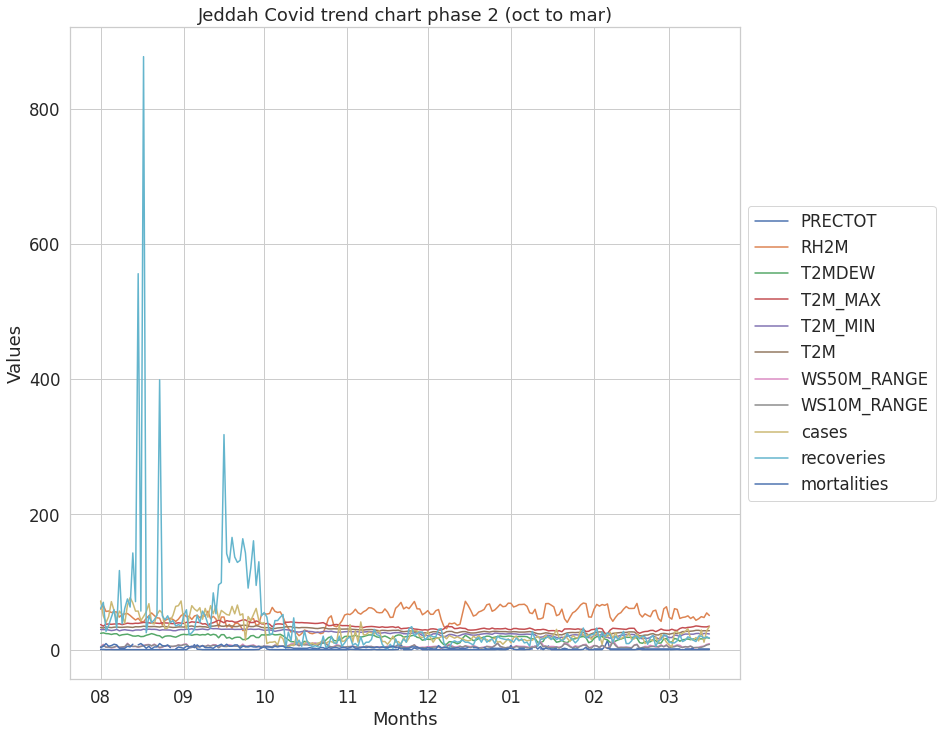

In [93]:
line_plot(phase2_jed, "Jeddah Covid trend chart phase 2 (oct to mar)");

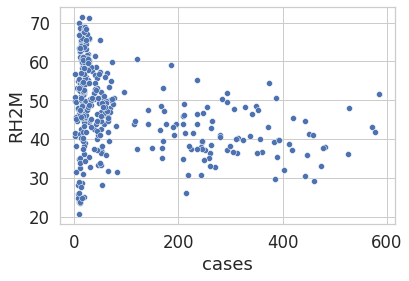

In [94]:
scatter_plot(df_jed, "cases", "RH2M") 

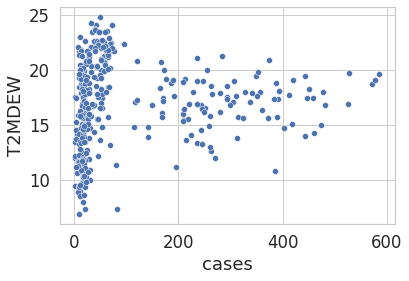

In [95]:
scatter_plot(df_jed, "cases", "T2MDEW")

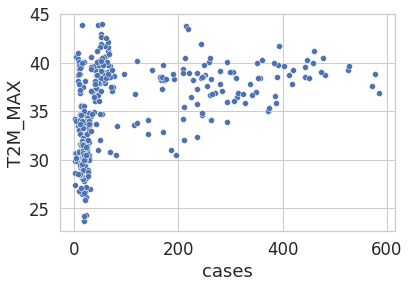

In [96]:
scatter_plot(df_jed, "cases", "T2M_MAX") 

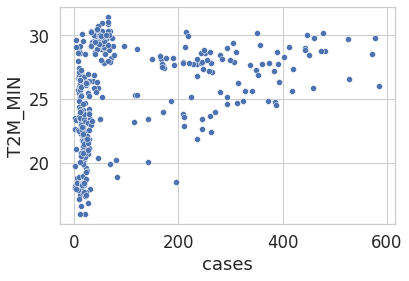

In [97]:
scatter_plot(df_jed, "cases", "T2M_MIN") 

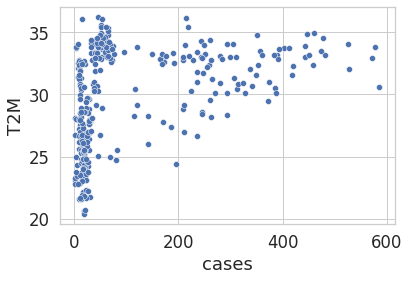

In [98]:
scatter_plot(df_jed, "cases", "T2M") 

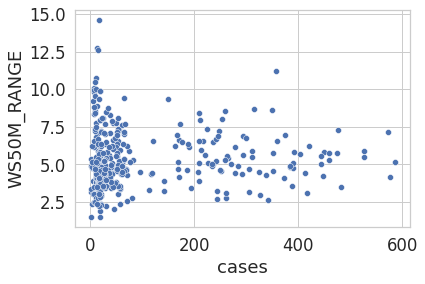

In [99]:
scatter_plot(df_jed, "cases", "WS50M_RANGE")

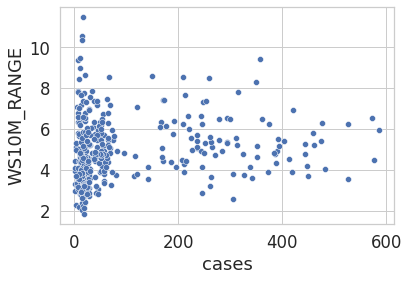

In [100]:
scatter_plot(df_jed, "cases", "WS10M_RANGE")

## Makkah

In [101]:
df_mak

PRECTOT   RH2M  T2MDEW  T2M_MAX  T2M_MIN    T2M  WS50M_RANGE  \
date                                                                       
2020-03-01      0.0  37.99    8.54    31.40    18.28  23.79         4.30   
2020-03-02      0.0  26.15    3.71    33.99    17.44  24.45         5.01   
2020-03-03      0.0  34.03    8.42    33.07    19.27  25.51         5.11   
2020-03-04      0.0  54.95   16.00    31.64    21.50  25.63         5.25   
2020-03-05      0.0  56.52   16.34    32.17    20.69  25.52         2.45   
...             ...    ...     ...      ...      ...    ...          ...   
2021-03-12      0.0  37.53   12.17    35.14    22.97  28.07         2.61   
2021-03-13      0.0  38.93   12.30    34.93    21.66  27.57         4.27   
2021-03-14      0.0  40.34   12.84    34.46    22.26  27.55         7.34   
2021-03-15      0.0  44.34   14.10    34.63    21.54  27.29         6.76   
2021-03-16      0.0  36.78   11.34    35.19    21.72  27.48         7.30   

            WS10M_RANGE  cases  recoveries  mortalities  
date                                                     
2020-03-01         5.14    NaN         NaN          NaN  
2020-03-02         3.40    NaN         NaN          NaN  
2020-03-03         4.52    NaN         NaN          NaN  
2020-03-04         5.58    NaN         NaN          NaN  
2020-03-05         3.62    NaN         NaN          NaN  
...                 ...    ...         ...          ...  
2021-03-12         3.61   16.0        38.0          NaN  
2021-03-13         4.43   19.0        19.0          NaN  
2021-03-14         7.02   20.0         7.0          NaN  
2021-03-15         6.87   24.0         8.0          NaN  
2021-03-16         7.35   19.0        12.0          NaN  

[381 rows x 11 columns]

In [102]:
phase1_mak, phase2_mak = phase_mask(df_mak)

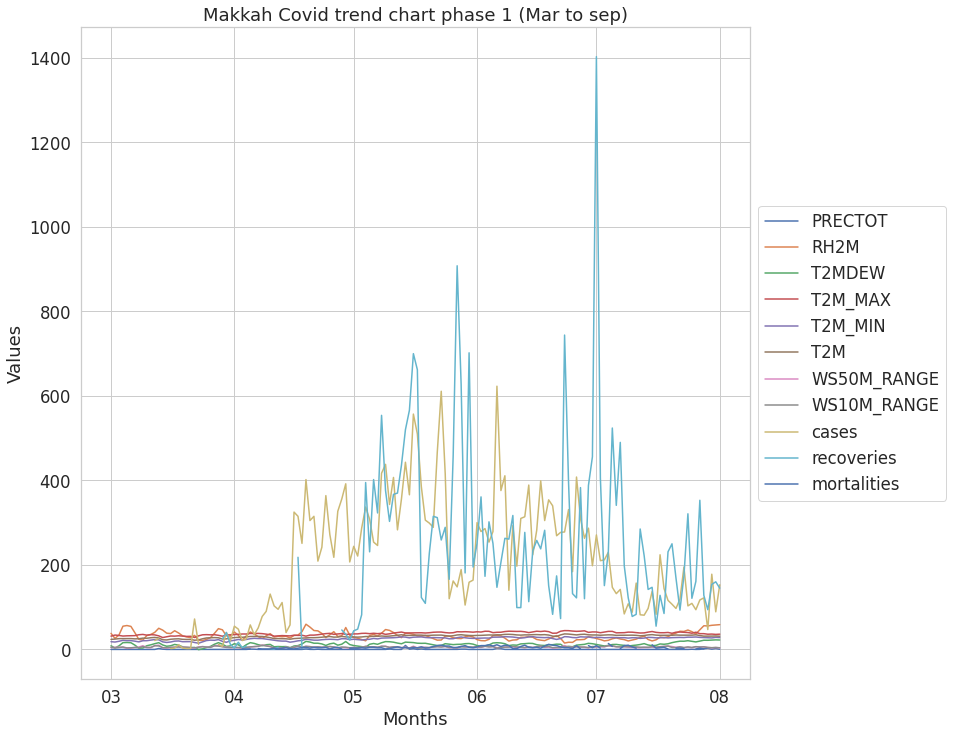

In [103]:
line_plot(phase1_mak, "Makkah Covid trend chart phase 1 (Mar to sep)");

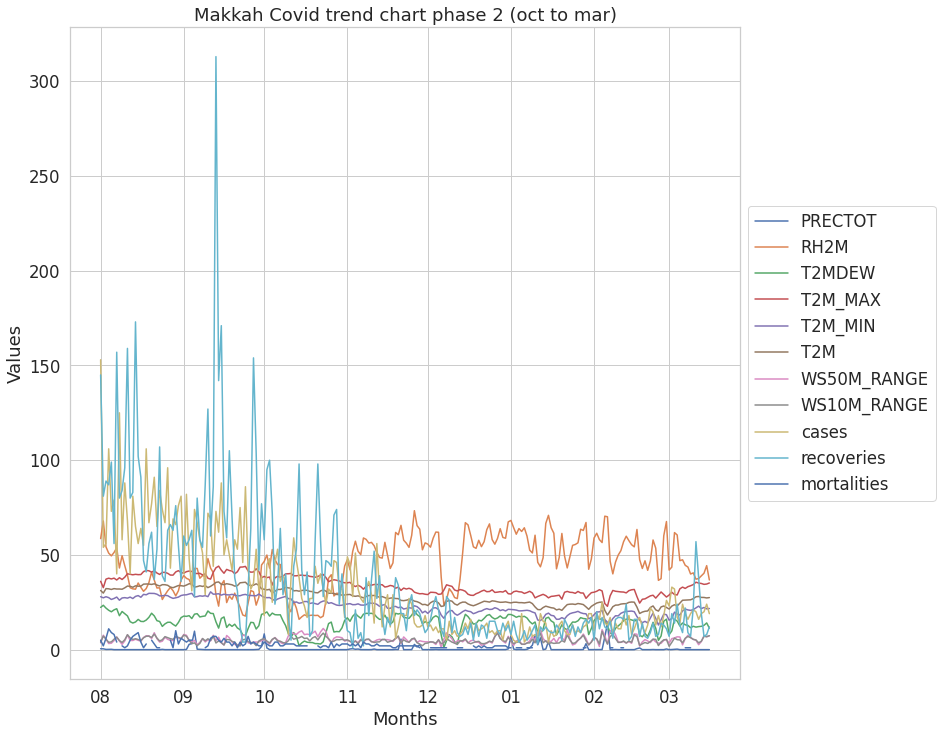

In [104]:
line_plot(phase2_mak, "Makkah Covid trend chart phase 2 (oct to mar)");

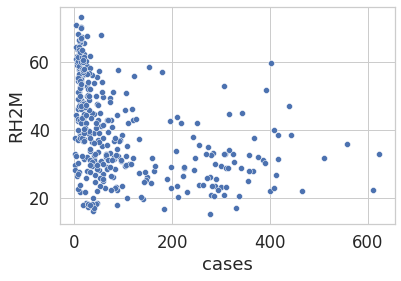

In [105]:
scatter_plot(df_mak, "cases", "RH2M")  

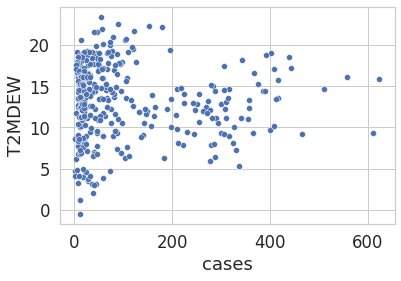

In [106]:
scatter_plot(df_mak, "cases", "T2MDEW")

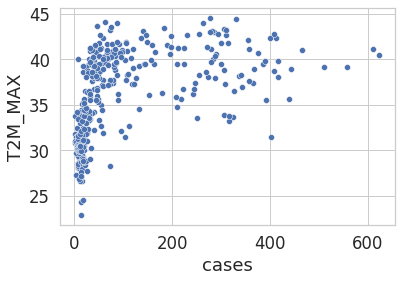

In [107]:
scatter_plot(df_mak, "cases", "T2M_MAX")  

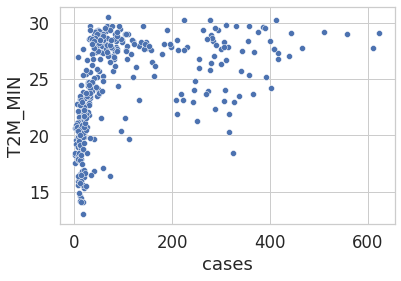

In [108]:
scatter_plot(df_mak, "cases", "T2M_MIN")

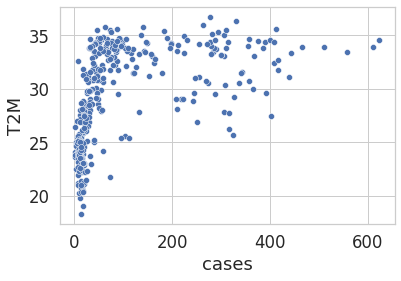

In [109]:
scatter_plot(df_mak, "cases", "T2M") 

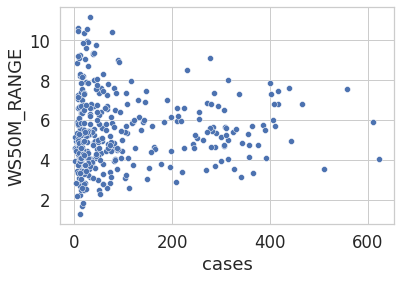

In [110]:
scatter_plot(df_mak, "cases", "WS50M_RANGE")

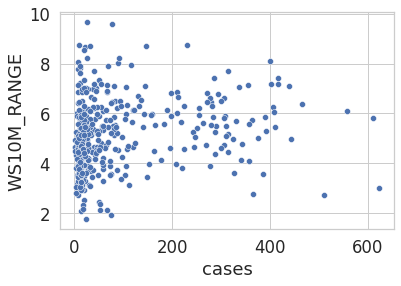

In [111]:
scatter_plot(df_mak, "cases", "WS10M_RANGE")

## Taif

In [112]:
df_taif

PRECTOT   RH2M  T2MDEW  T2M_MAX  T2M_MIN    T2M  WS50M_RANGE  \
date                                                                       
2020-03-01      0.0  33.95    5.03    30.64    15.82  21.70         6.46   
2020-03-02      0.0  17.35   -3.79    32.29    14.39  22.18         4.14   
2020-03-03      0.0  28.32    3.91    32.37    16.46  23.38         9.46   
2020-03-04      0.0  53.15   13.24    30.48    17.65  23.24         7.18   
2020-03-05      0.0  53.85   13.30    31.21    16.99  23.08         3.78   
...             ...    ...     ...      ...      ...    ...          ...   
2021-03-12      0.0  34.60    8.79    33.68    19.97  25.65         5.68   
2021-03-13      0.0  32.87    7.76    33.63    19.10  25.35         5.84   
2021-03-14      0.0  35.88    9.01    33.25    18.87  25.28         6.08   
2021-03-15      0.0  37.60    9.31    33.52    17.93  24.83         5.01   
2021-03-16      0.0  30.97    6.38    33.62    17.91  24.76         5.55   

            WS10M_RANGE  cases  recoveries  mortalities  
date                                                     
2020-03-01         6.39    NaN         NaN          NaN  
2020-03-02         4.20    NaN         NaN          NaN  
2020-03-03         7.41    NaN         NaN          NaN  
2020-03-04         7.10    NaN         NaN          NaN  
2020-03-05         4.26    NaN         NaN          NaN  
...                 ...    ...         ...          ...  
2021-03-12         5.92    2.0         2.0          NaN  
2021-03-13         5.90    NaN         1.0          NaN  
2021-03-14         6.33    1.0         1.0          1.0  
2021-03-15         6.06    3.0         NaN          1.0  
2021-03-16         6.05    2.0         1.0          NaN  

[381 rows x 11 columns]

In [113]:
phase1_taif, phase2_taif = phase_mask(df_taif)

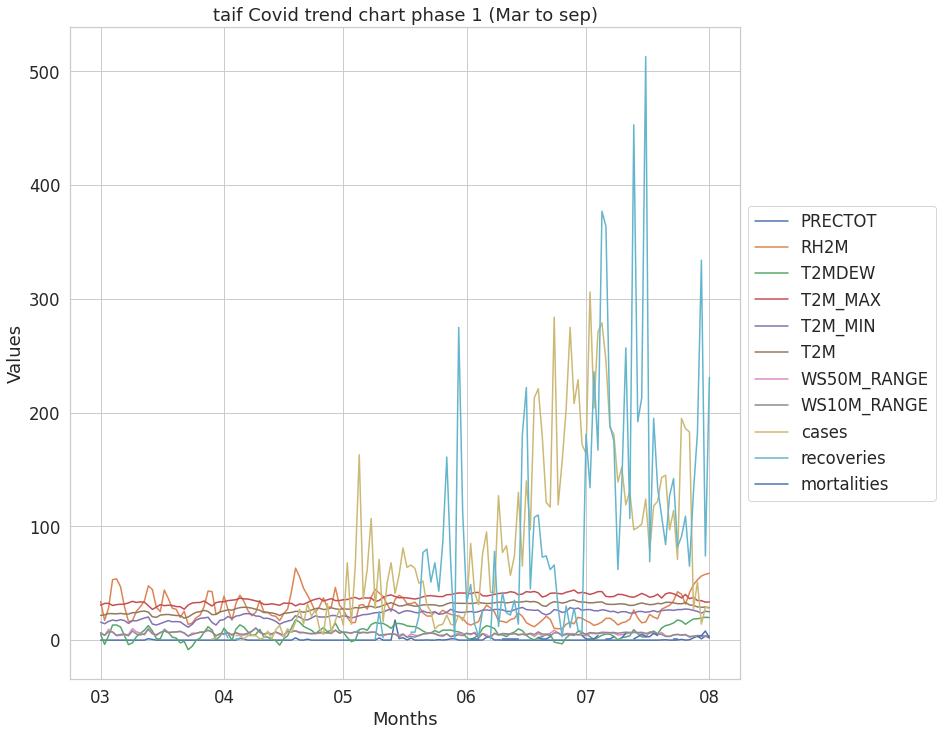

In [114]:
line_plot(phase1_taif, "taif Covid trend chart phase 1 (Mar to sep)");

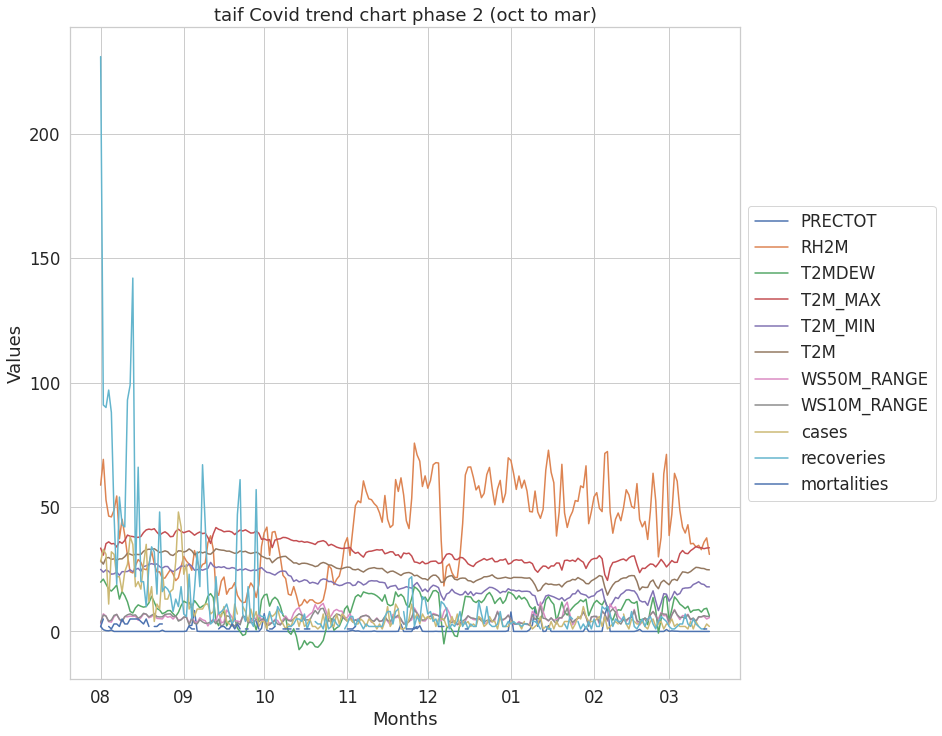

In [115]:
line_plot(phase2_taif, "taif Covid trend chart phase 2 (oct to mar)");

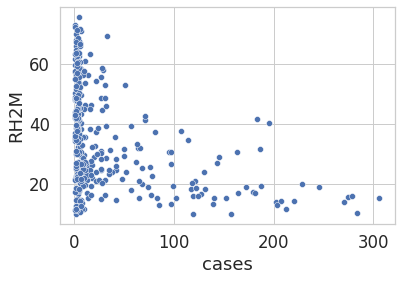

In [116]:
scatter_plot(df_taif, "cases", "RH2M")  

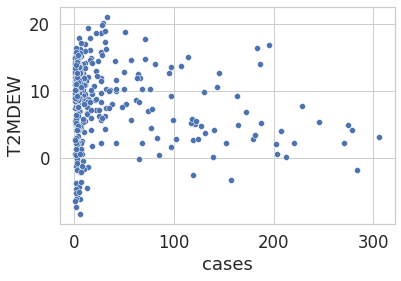

In [117]:
scatter_plot(df_taif, "cases", "T2MDEW")

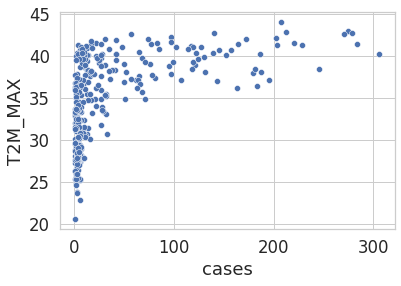

In [118]:
scatter_plot(df_taif, "cases", "T2M_MAX")

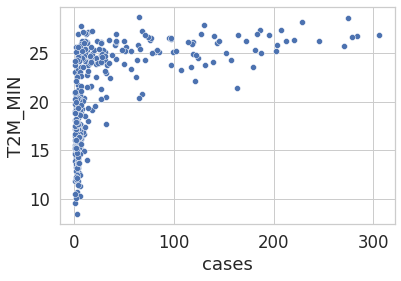

In [119]:
scatter_plot(df_taif, "cases", "T2M_MIN")

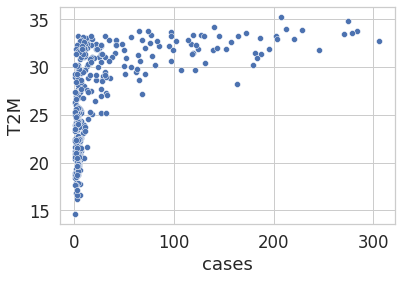

In [120]:
scatter_plot(df_taif, "cases", "T2M")

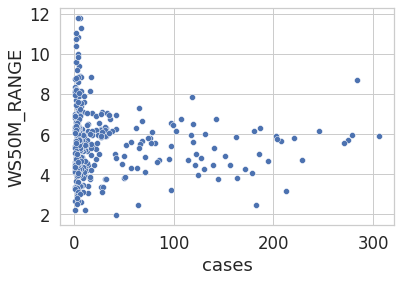

In [121]:
scatter_plot(df_taif, "cases", "WS50M_RANGE")

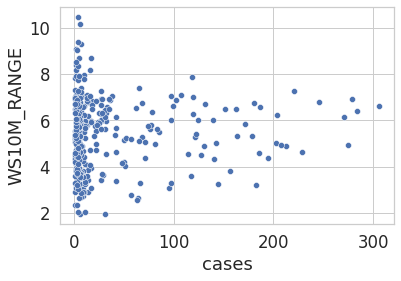

In [122]:
scatter_plot(df_taif, "cases", "WS10M_RANGE")

## Madinah

In [124]:
df_madina

PRECTOT   RH2M  T2MDEW  T2M_MAX  T2M_MIN    T2M  WS50M_RANGE  \
date                                                                       
2020-03-01      0.0  22.97   -2.91    28.93     9.67  18.74         3.55   
2020-03-02      0.0  14.52   -9.58    28.81     8.30  17.90         7.59   
2020-03-03      0.0  14.81   -7.59    31.14     9.82  20.08         5.39   
2020-03-04      0.0  26.91    2.13    32.34    13.33  22.15         4.67   
2020-03-05      0.0  34.73    6.83    32.10    16.06  23.37         5.84   
...             ...    ...     ...      ...      ...    ...          ...   
2021-03-12      0.0  25.35    4.24    34.59    18.27  25.60         9.27   
2021-03-13      0.0  20.90   -1.11    32.92    12.44  22.39         6.94   
2021-03-14      0.0  26.66    3.91    35.06    15.54  24.38         6.64   
2021-03-15      0.0  34.66    8.95    35.12    17.72  25.80         8.76   
2021-03-16      0.0  41.63   11.31    34.03    17.34  25.31         8.69   

            WS10M_RANGE  cases  recoveries  mortalities  
date                                                     
2020-03-01         4.05    NaN         NaN          NaN  
2020-03-02         6.70    NaN         NaN          NaN  
2020-03-03         5.50    NaN         NaN          NaN  
2020-03-04         4.53    NaN         NaN          NaN  
2020-03-05         3.49    NaN         NaN          NaN  
...                 ...    ...         ...          ...  
2021-03-12         8.87   10.0         2.0          1.0  
2021-03-13         6.36    3.0         1.0          1.0  
2021-03-14         6.75    7.0         1.0          1.0  
2021-03-15         8.20    5.0         NaN          1.0  
2021-03-16         8.15    5.0         1.0          1.0  

[381 rows x 11 columns]

In [125]:
phase1_madina, phase2_madina = phase_mask(df_madina)

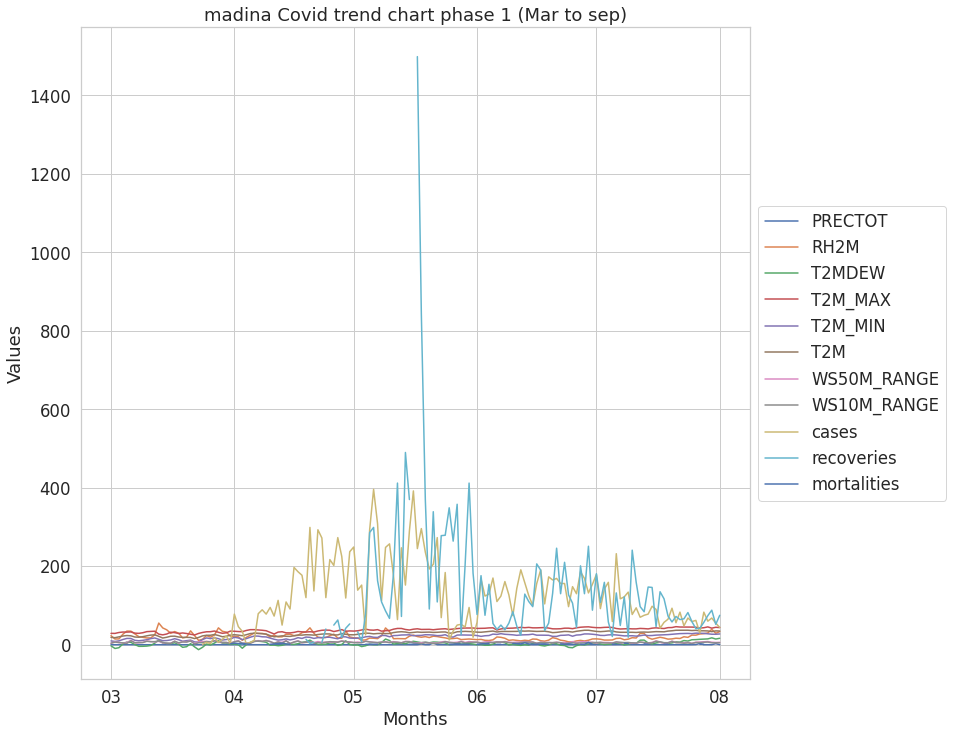

In [126]:
line_plot(phase1_madina, "madina Covid trend chart phase 1 (Mar to sep)");

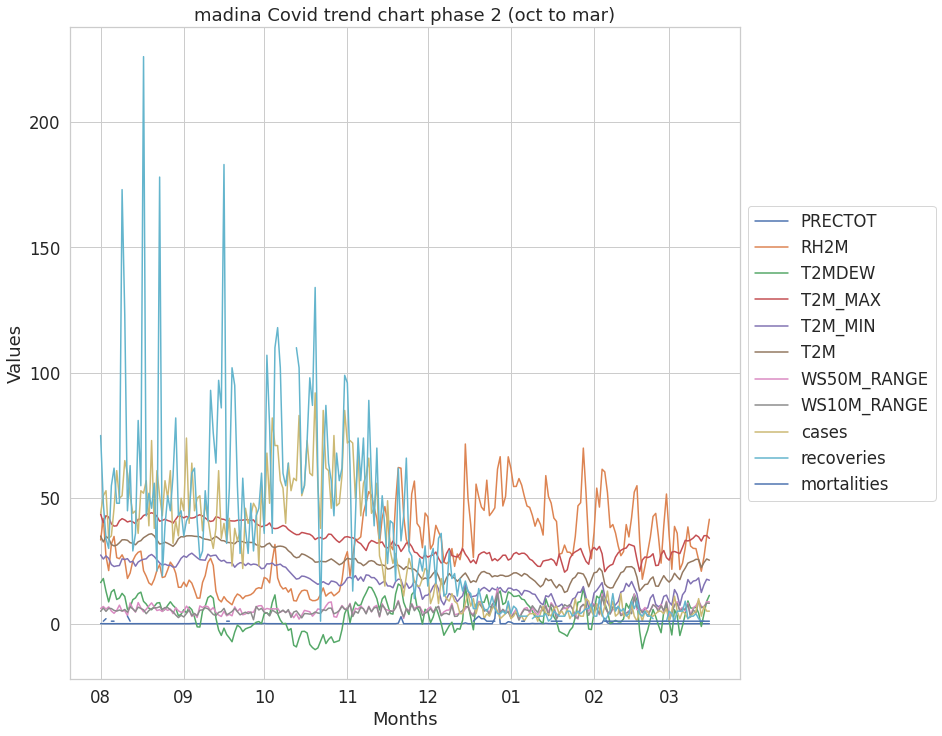

In [127]:
line_plot(phase2_madina, "madina Covid trend chart phase 2 (oct to mar)");

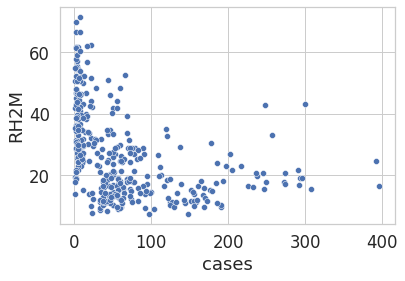

In [128]:
scatter_plot(df_madina, "cases", "RH2M")  

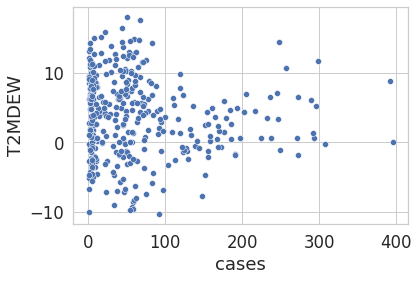

In [130]:
scatter_plot(df_madina, "cases", "T2MDEW")

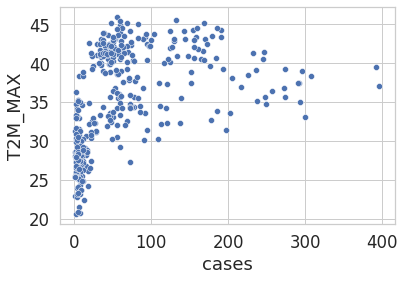

In [131]:
scatter_plot(df_madina, "cases", "T2M_MAX")

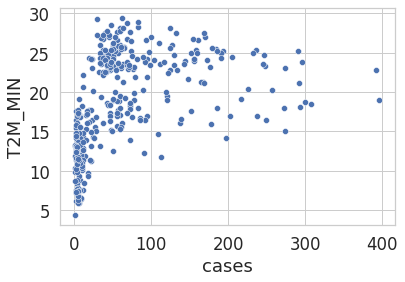

In [132]:
scatter_plot(df_madina, "cases", "T2M_MIN")

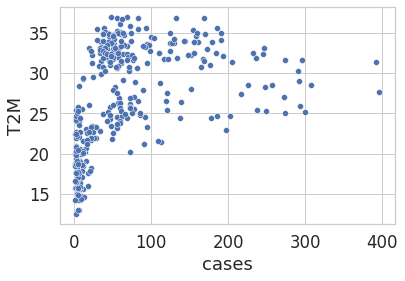

In [133]:
scatter_plot(df_madina, "cases", "T2M") 

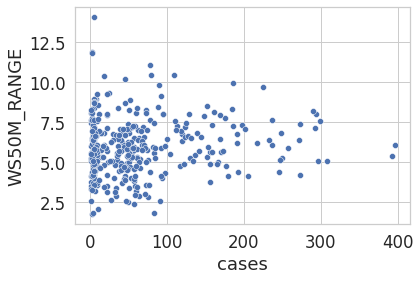

In [134]:
scatter_plot(df_madina, "cases", "WS50M_RANGE")

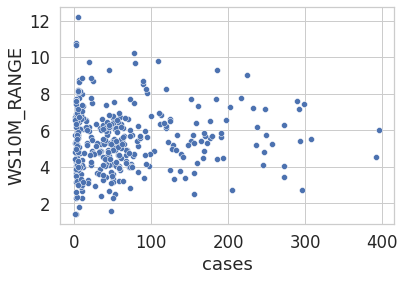

In [135]:
scatter_plot(df_madina, "cases", "WS10M_RANGE")

## Riyadh

In [136]:
df_riyadh

PRECTOT   RH2M     PS  T2M_RANGE  T2M_MAX  T2M_MIN  WS50M  WS10M  \
DATE                                                                           
2020-03-01      0.0  19.84  93.68      16.67    32.32    15.65   8.14   5.28   
2020-03-02      0.0  25.41  94.30      14.27    24.93    10.67   7.05   5.09   
2020-03-03      0.0  21.90  94.52      17.26    24.38     7.12   4.41   2.92   
2020-03-04      0.0  21.29  94.38      17.02    26.40     9.39   3.84   2.69   
2020-03-05      0.0  20.65  94.27      17.57    28.20    10.63   3.44   2.25   
...             ...    ...    ...        ...      ...      ...    ...    ...   
2021-03-12      0.0  22.78  93.44      17.59    34.90    17.31  11.88   8.12   
2021-03-13      0.0  33.72  94.10      13.86    25.49    11.64   5.79   3.82   
2021-03-14      0.0  31.64  94.11      17.25    26.79     9.54   3.72   2.24   
2021-03-15      0.0  25.36  93.92      18.56    30.25    11.69   7.09   4.54   
2021-03-16      0.0  23.64  93.82      18.59    33.30    14.70   8.33   5.30   

            cases  recoveries  mortalities  
DATE                                        
2020-03-01    NaN         NaN          NaN  
2020-03-02    NaN         NaN          NaN  
2020-03-03    NaN         NaN          NaN  
2020-03-04    NaN         NaN          NaN  
2020-03-05    NaN         NaN          NaN  
...           ...         ...          ...  
2021-03-12  119.0        77.0          1.0  
2021-03-13  121.0        82.0          1.0  
2021-03-14  106.0        89.0          1.0  
2021-03-15  120.0        85.0          NaN  
2021-03-16  108.0        92.0          1.0  

[381 rows x 11 columns]

In [137]:
phase1_riyadh, phase2_riyadh = phase_mask(df_riyadh)

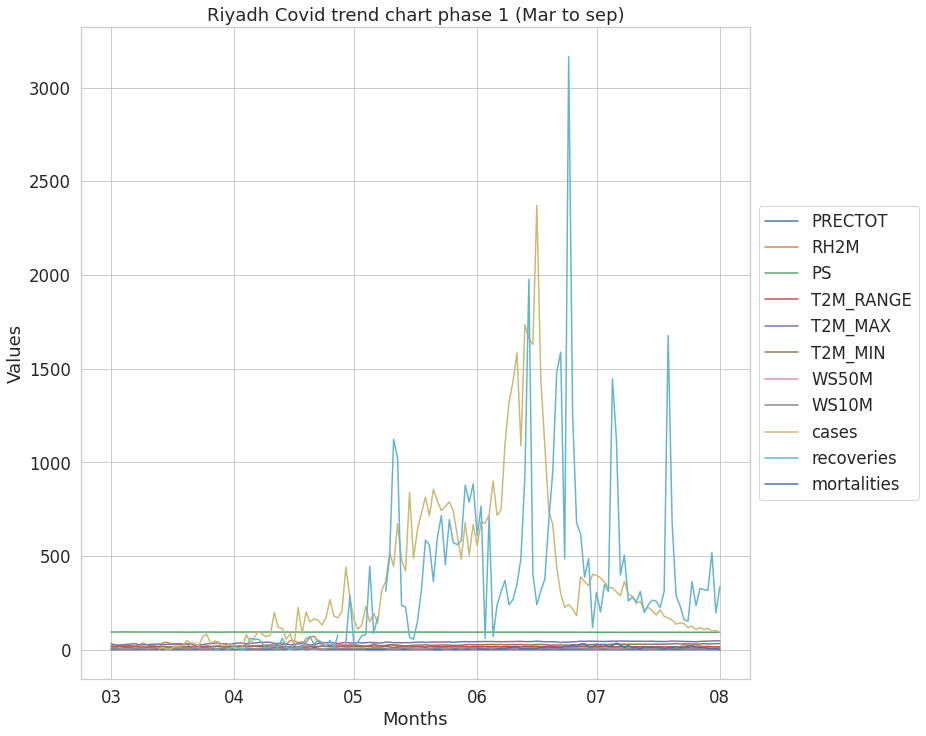

In [138]:
line_plot(phase1_riyadh, "Riyadh Covid trend chart phase 1 (Mar to sep)");

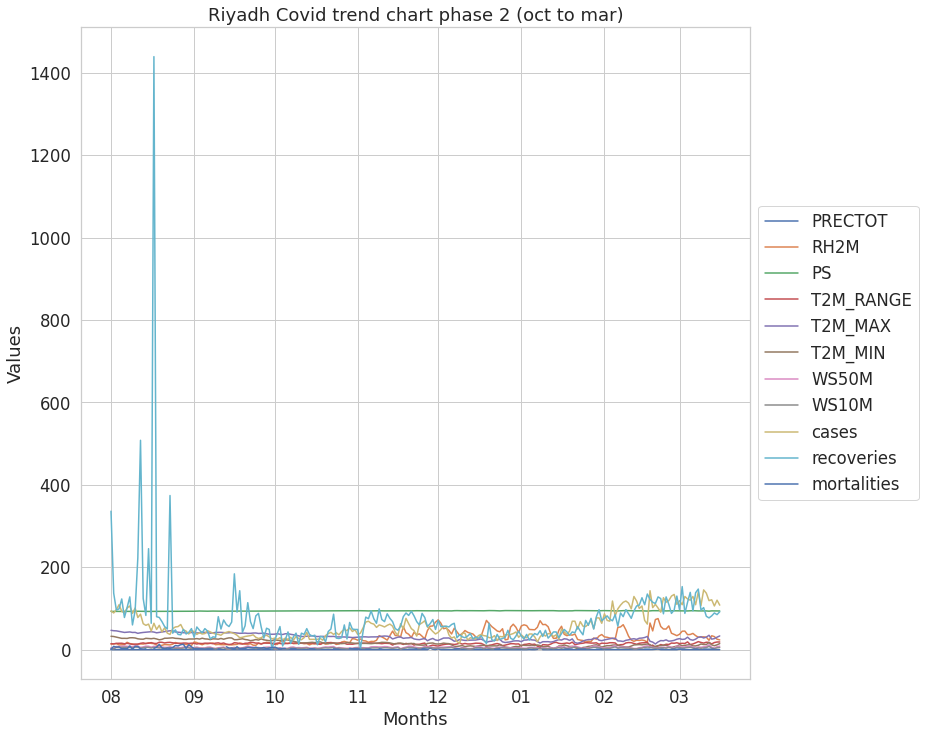

In [139]:
line_plot(phase2_riyadh, "Riyadh Covid trend chart phase 2 (oct to mar)");

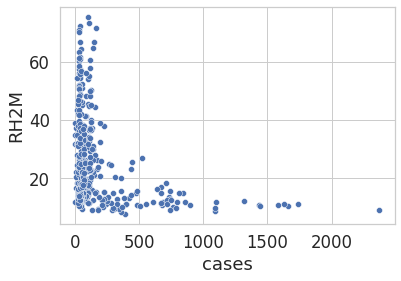

In [140]:
scatter_plot(df_riyadh, "cases", "RH2M")  

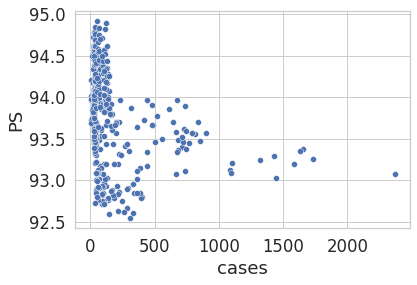

In [147]:
scatter_plot(df_riyadh, "cases", "PS")

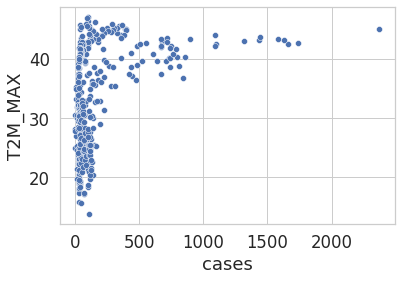

In [142]:
scatter_plot(df_riyadh, "cases", "T2M_MAX") 

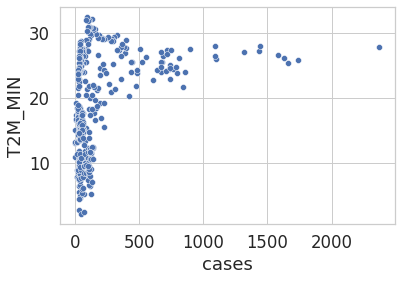

In [143]:
scatter_plot(df_riyadh, "cases", "T2M_MIN") 

In [148]:
# unavailible data for temperature dew point, wind speed in 10m/50m range, temperature
'''
scatter_plot(df_riyadh, "cases", "T2MDEW")
scatter_plot(df_riyadh, "cases", "WS10M_RANGE")
scatter_plot(df_riyadh, "cases", "WS50M_RANGE")
scatter_plot(df_riyadh, "cases", "T2M")
''';

## Dammam

In [151]:
df_dam

PRECTOT   RH2M  T2MDEW  T2M_MAX  T2M_MIN    T2M  WS50M_RANGE  \
date                                                                       
2020-03-01      0.0  57.94   12.32    26.02    16.19  20.82         5.00   
2020-03-02      0.0  61.28   12.07    22.56    16.63  19.63         8.49   
2020-03-03      0.0  59.57   10.68    21.96    16.34  18.62         4.44   
2020-03-04      0.0  56.74    9.63    22.12    14.97  18.30         3.98   
2020-03-05      0.0  61.78   11.49    23.35    15.23  18.90         4.70   
...             ...    ...     ...      ...      ...    ...          ...   
2021-03-12      0.0  36.41    9.71    32.35    19.95  25.81         8.29   
2021-03-13      0.0  50.32   10.37    24.16    17.54  21.06         6.54   
2021-03-14      0.0  50.69    8.80    23.04    16.22  19.25         5.27   
2021-03-15      0.0  51.56    9.74    24.08    16.18  19.99         1.57   
2021-03-16      0.0  53.87   12.60    28.16    17.37  22.33         4.71   

            WS10M_RANGE  cases  recoveries  mortalities  
date                                                     
2020-03-01         2.89    NaN         NaN          NaN  
2020-03-02         7.71    NaN         NaN          NaN  
2020-03-03         4.22    NaN         NaN          NaN  
2020-03-04         3.85    NaN         NaN          NaN  
2020-03-05         3.57    NaN         NaN          NaN  
...                 ...    ...         ...          ...  
2021-03-12         5.87   10.0         5.0          NaN  
2021-03-13         4.97   10.0         7.0          NaN  
2021-03-14         3.64   18.0         9.0          1.0  
2021-03-15         1.40   14.0         7.0          NaN  
2021-03-16         2.73   14.0         5.0          NaN  

[381 rows x 11 columns]

In [152]:
phase1_dam, phase2_dam = phase_mask(df_dam)

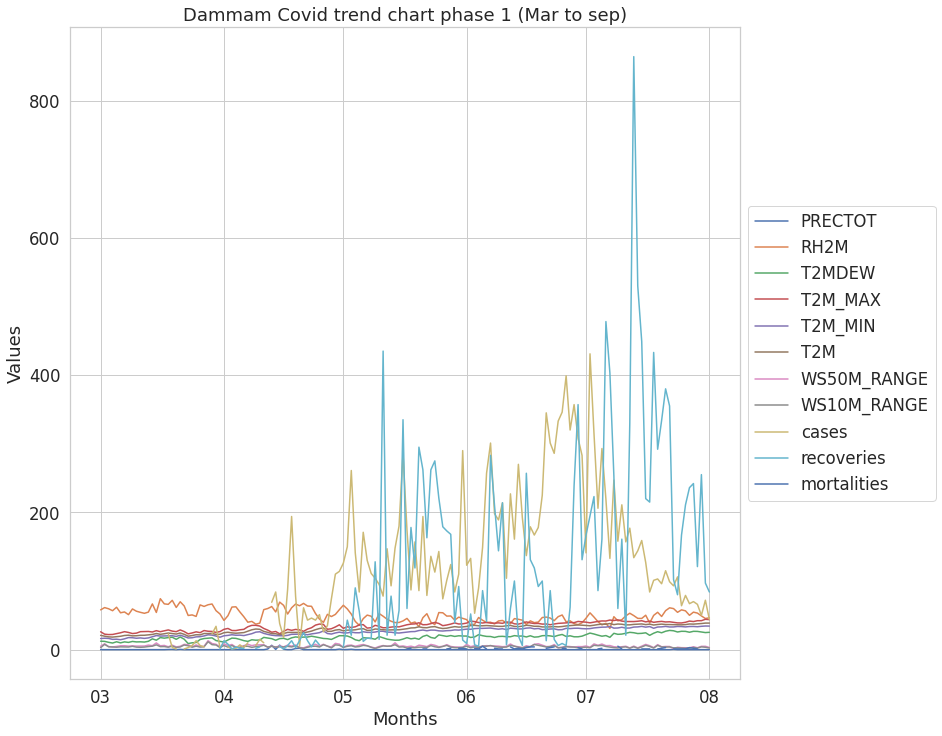

In [153]:
line_plot(phase1_dam, "Dammam Covid trend chart phase 1 (Mar to sep)");

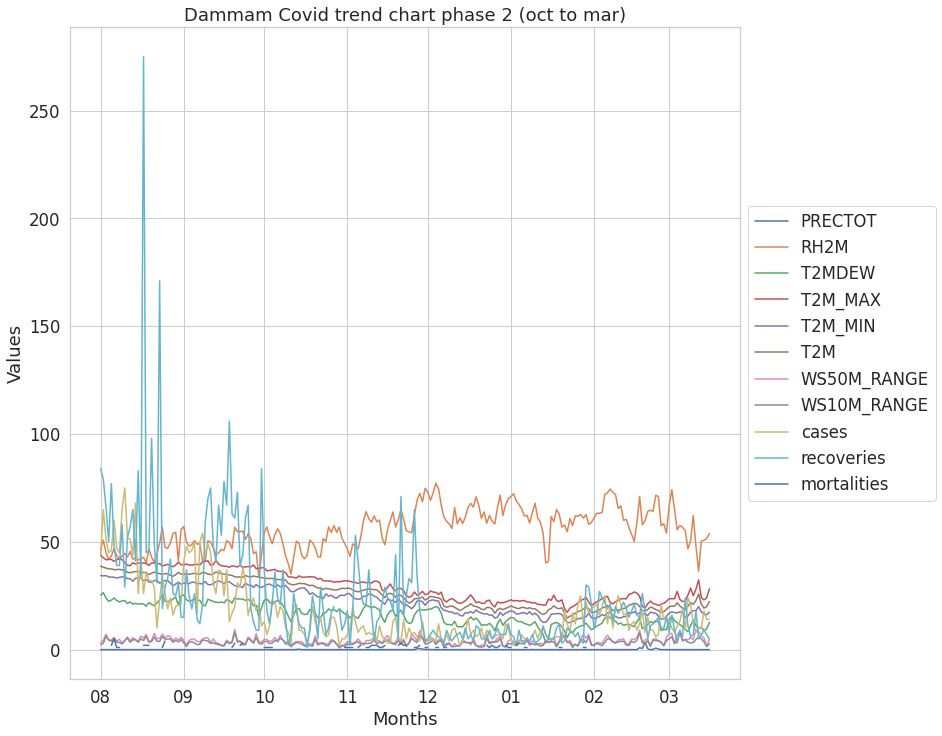

In [154]:
line_plot(phase2_dam, "Dammam Covid trend chart phase 2 (oct to mar)");

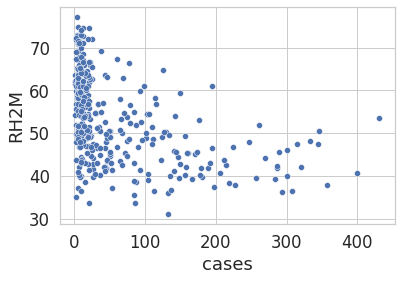

In [155]:
scatter_plot(df_dam, "cases", "RH2M")  

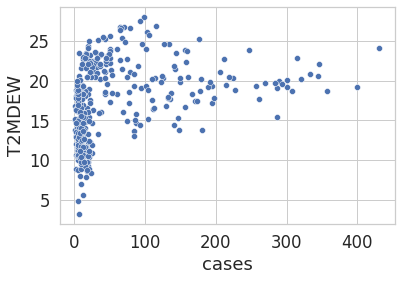

In [156]:
scatter_plot(df_dam, "cases", "T2MDEW")

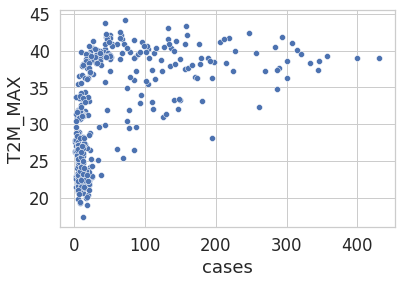

In [157]:
scatter_plot(df_dam, "cases", "T2M_MAX") 

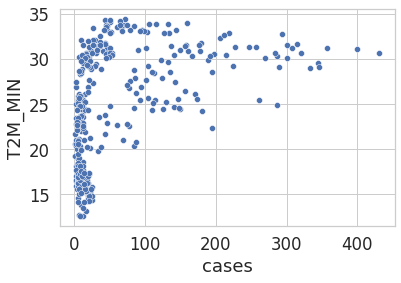

In [158]:
scatter_plot(df_dam, "cases", "T2M_MIN") 

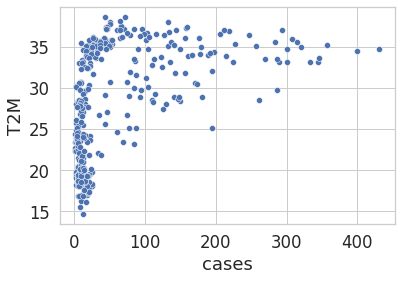

In [159]:
scatter_plot(df_dam, "cases", "T2M") 

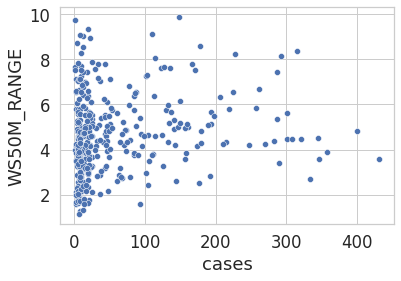

In [160]:
scatter_plot(df_dam, "cases", "WS50M_RANGE")

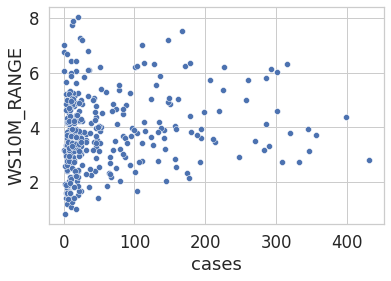

In [161]:
scatter_plot(df_dam, "cases", "WS10M_RANGE")

## Hofuf

In [162]:
df_hofuf

PRECTOT   RH2M  T2MDEW  T2M_MAX  T2M_MIN    T2M  WS50M_RANGE  \
DATE                                                                       
2020-03-01      0.0  26.36    0.98    30.45    13.16  21.14         4.94   
2020-03-02      0.0  38.37    4.72    25.90    13.05  19.35         8.59   
2020-03-03      0.0  44.15    4.44    24.44    10.37  16.76         4.08   
2020-03-04      0.0  32.09   -0.05    24.97     9.90  16.84         4.52   
2020-03-05      0.0  34.46    1.41    26.08    10.20  17.37         4.18   
...             ...    ...     ...      ...      ...    ...          ...   
2021-03-12      0.0  15.25   -1.07    37.07    19.76  27.73         6.83   
2021-03-13      0.0  30.98    3.55    27.31    14.97  21.51         8.47   
2021-03-14      0.0  29.22   -0.35    25.67    11.48  17.96         4.74   
2021-03-15      0.0  28.21    1.37    28.72    14.19  20.50         6.11   
2021-03-16      0.0  25.12    2.87    34.60    14.54  24.13         4.33   

            WS10M_RANGE  cases  recoveries  mortalities  
DATE                                                     
2020-03-01         3.26    NaN         NaN          NaN  
2020-03-02         8.34    NaN         NaN          NaN  
2020-03-03         4.58    NaN         NaN          NaN  
2020-03-04         4.85    NaN         NaN          NaN  
2020-03-05         3.49    NaN         NaN          NaN  
...                 ...    ...         ...          ...  
2021-03-12         7.66   22.0         7.0          1.0  
2021-03-13         6.56   10.0        13.0          NaN  
2021-03-14         4.46   15.0         7.0          NaN  
2021-03-15         3.03   10.0         8.0          NaN  
2021-03-16         2.76   17.0         1.0          1.0  

[381 rows x 11 columns]

In [163]:
phase1_hofuf, phase2_hofuf = phase_mask(df_hofuf)

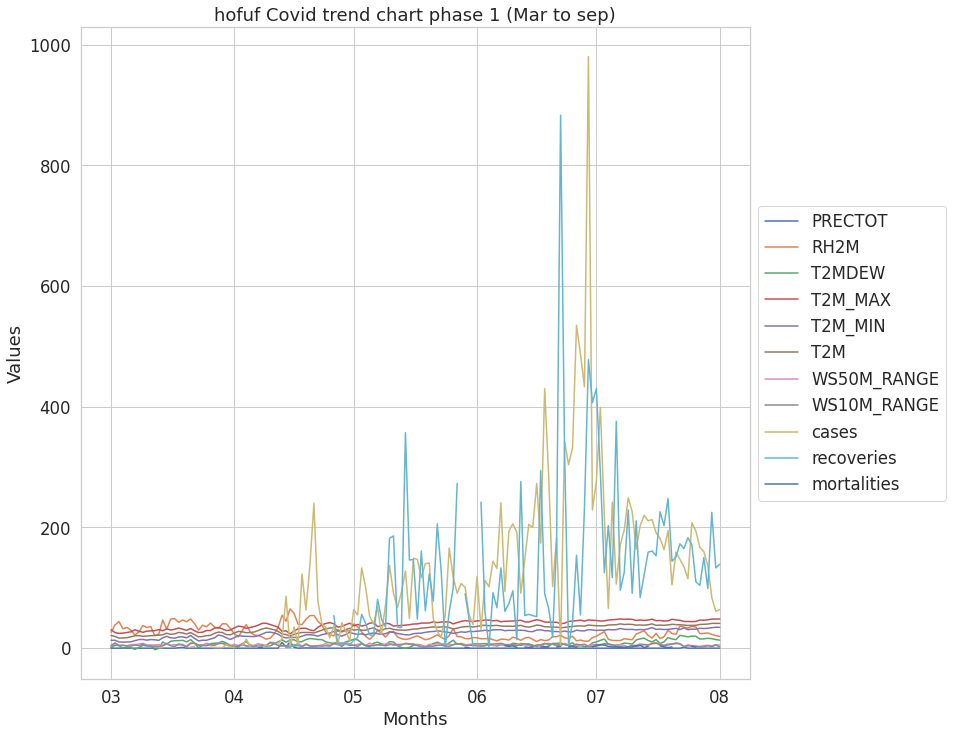

In [164]:
line_plot(phase1_hofuf, "hofuf Covid trend chart phase 1 (Mar to sep)");

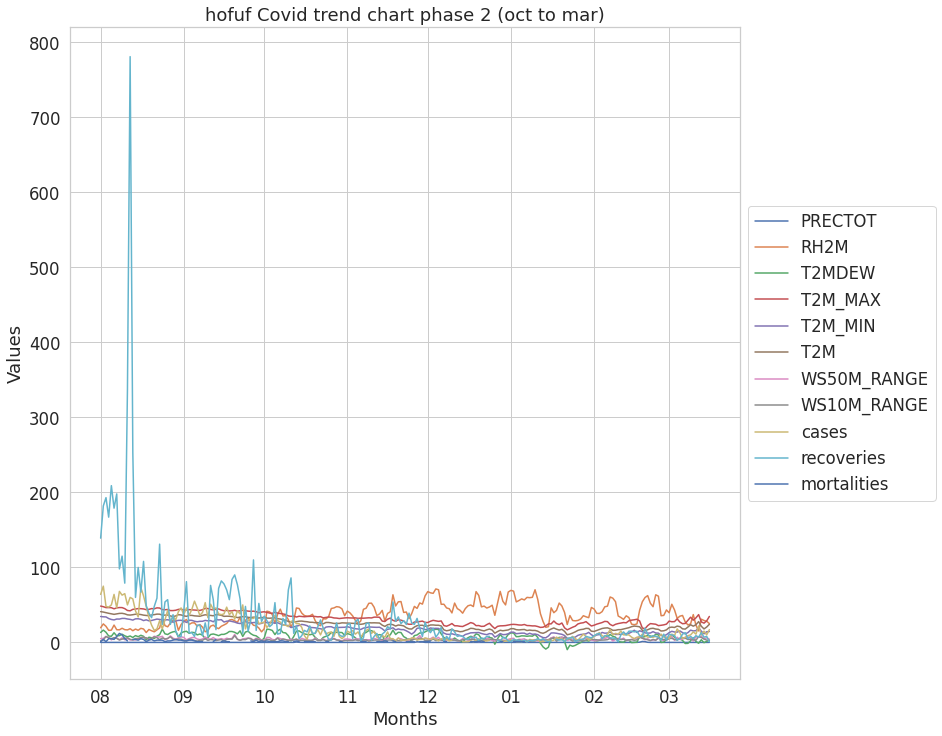

In [165]:
line_plot(phase2_hofuf, "hofuf Covid trend chart phase 2 (oct to mar)");

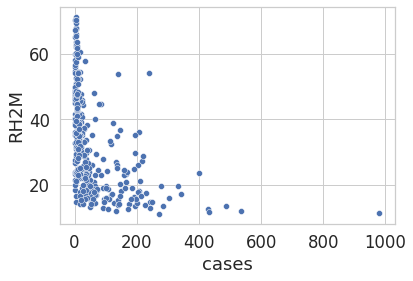

In [166]:
scatter_plot(df_hofuf, "cases", "RH2M") 

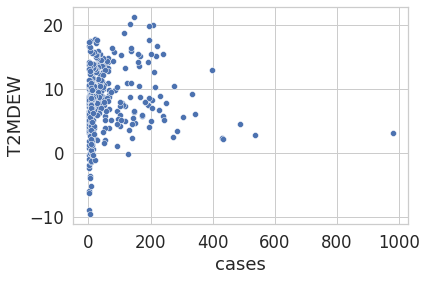

In [167]:
scatter_plot(df_hofuf, "cases", "T2MDEW")

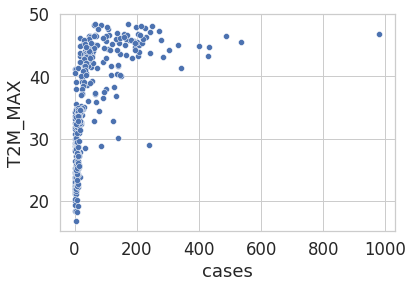

In [168]:
scatter_plot(df_hofuf, "cases", "T2M_MAX") 

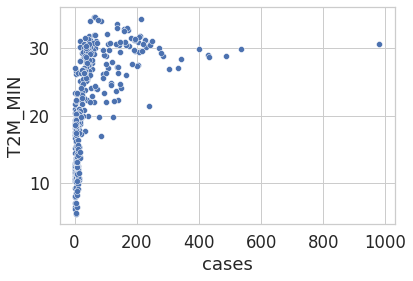

In [169]:
scatter_plot(df_hofuf, "cases", "T2M_MIN") 

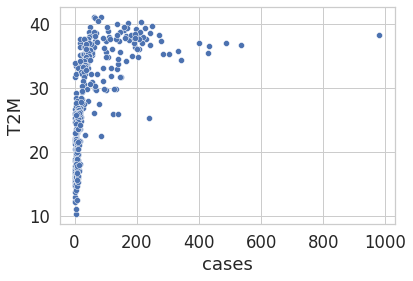

In [170]:
scatter_plot(df_hofuf, "cases", "T2M")

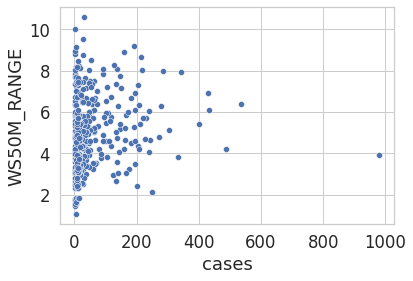

In [171]:
scatter_plot(df_hofuf, "cases", "WS50M_RANGE")

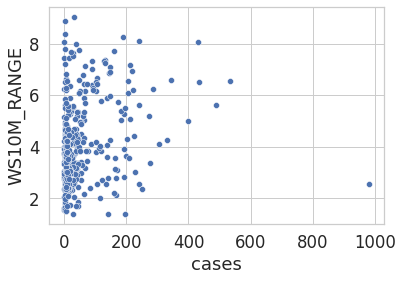

In [172]:
scatter_plot(df_hofuf, "cases", "WS10M_RANGE")

## Jubail

In [173]:
df_jubail

PRECTOT   RH2M  T2MDEW  T2M_MAX  T2M_MIN    T2M  WS50M_RANGE  \
DATE                                                                       
2020-03-01     0.00  50.23   10.43    27.75    15.50  21.17         5.94   
2020-03-02     0.00  55.92   10.26    22.47    15.57  19.20         4.46   
2020-03-03     0.00  55.50    9.08    22.04    15.15  18.07         4.99   
2020-03-04     0.00  51.66    7.77    22.29    13.96  17.84         4.20   
2020-03-05     0.00  54.79    9.37    23.92    14.27  18.58         6.31   
...             ...    ...     ...      ...      ...    ...          ...   
2021-03-12     0.00  33.42    8.39    34.08    18.80  25.78         9.87   
2021-03-13     0.00  45.99    8.21    24.12    16.19  20.22         7.14   
2021-03-14     0.00  45.02    6.25    23.22    14.55  18.42         5.51   
2021-03-15     0.00  45.46    7.45    24.56    15.08  19.59         1.75   
2021-03-16     0.01  52.82   11.70    28.25    16.10  21.69         6.69   

            WS10M_RANGE  cases  recoveries  mortalities  
DATE                                                     
2020-03-01         5.22    NaN         NaN          NaN  
2020-03-02         5.15    NaN         NaN          NaN  
2020-03-03         5.07    NaN         NaN          NaN  
2020-03-04         4.62    NaN         NaN          NaN  
2020-03-05         4.46    NaN         NaN          NaN  
...                 ...    ...         ...          ...  
2021-03-12         7.37    7.0         1.0          NaN  
2021-03-13         5.71    3.0         3.0          NaN  
2021-03-14         3.72    2.0         2.0          NaN  
2021-03-15         1.05    2.0         2.0          NaN  
2021-03-16         4.24    3.0         1.0          NaN  

[381 rows x 11 columns]

In [175]:
phase1_jubail, phase2_jubail = phase_mask(df_jubail)

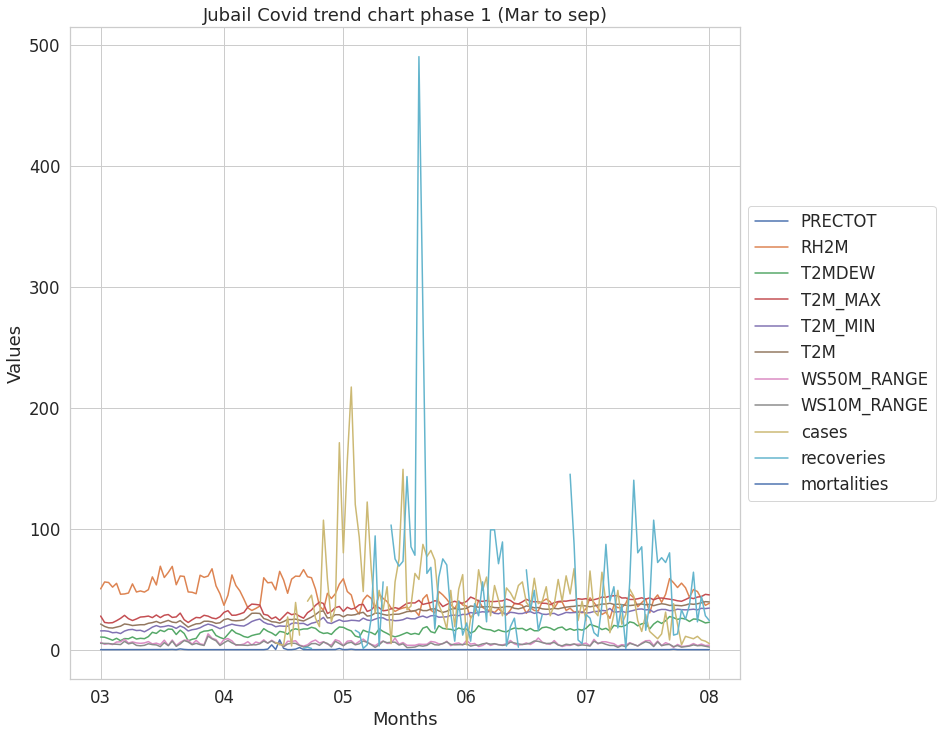

In [176]:
line_plot(phase1_jubail, "Jubail Covid trend chart phase 1 (Mar to sep)");


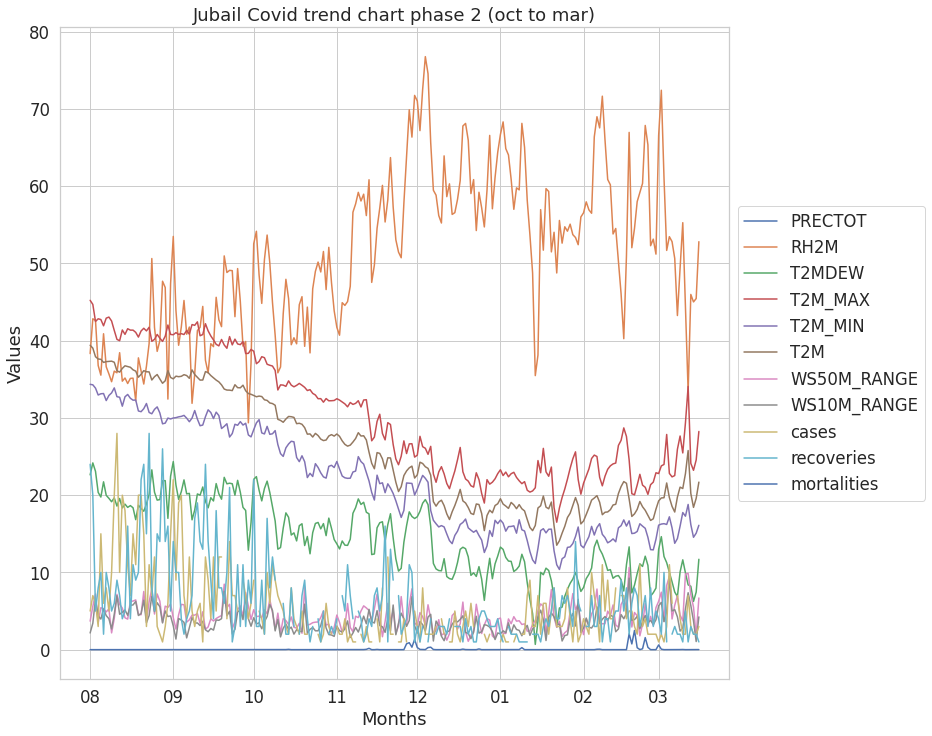

In [177]:
line_plot(phase2_jubail, "Jubail Covid trend chart phase 2 (oct to mar)");


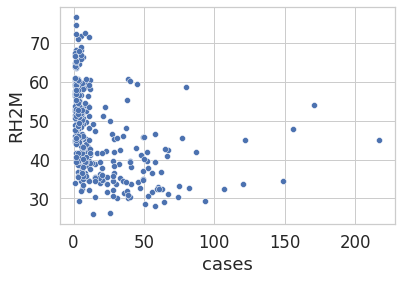

In [178]:
scatter_plot(df_jubail, "cases", "RH2M") 


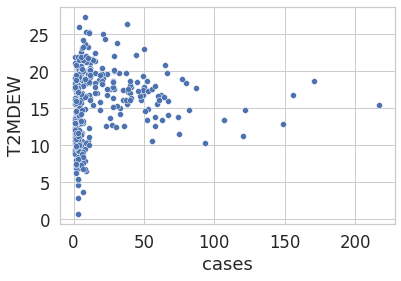

In [179]:
scatter_plot(df_jubail, "cases", "T2MDEW")


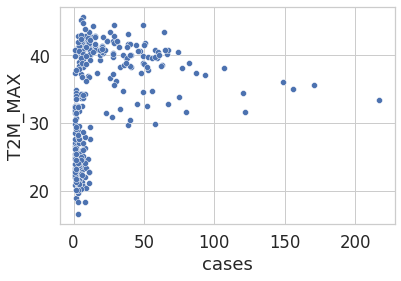

In [180]:
scatter_plot(df_jubail, "cases", "T2M_MAX") 


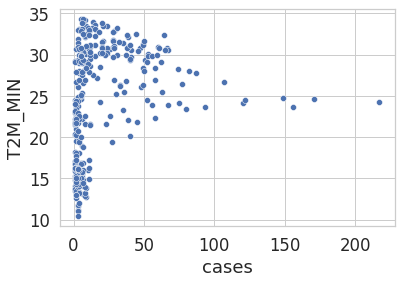

In [181]:
scatter_plot(df_jubail, "cases", "T2M_MIN") 


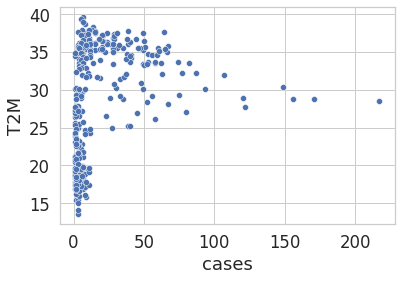

In [182]:
scatter_plot(df_jubail, "cases", "T2M")


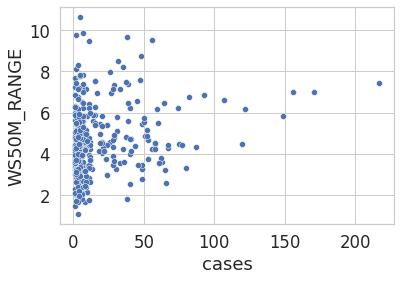

In [183]:
scatter_plot(df_jubail, "cases", "WS50M_RANGE")


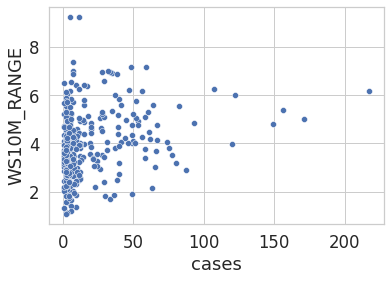

In [184]:
scatter_plot(df_jubail, "cases", "WS10M_RANGE")